In [194]:
!pip install country_converter

python(22291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [195]:
!pip install contextily

python(22292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [196]:
!pip install geopandas

python(22293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [546]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
import country_converter as coco
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import viridis

In [547]:
file_path = "//Users//rishabkhuba//Desktop//UML Project//HydroWASTE_v10.csv"

df = pd.read_csv(file_path)
df.head()

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874.0,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585.0,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105.0,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,Secondary,1,2061.969,20247446.0,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330.0,0.405,0,0,1490.0,2


In [548]:
print(df.shape)

(58502, 25)


In [549]:
print(df.columns)

Index(['WASTE_ID', 'SOURCE', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO',
       'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL',
       'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_10KM', 'COAST_50KM',
       'DESIGN_CAP', 'QUAL_CAP'],
      dtype='object')


In [550]:
df.isna().sum()
# No NULL values

WASTE_ID      0
SOURCE        0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58502 entries, 0 to 58501
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WASTE_ID    58502 non-null  int64  
 1   SOURCE      58502 non-null  int64  
 2   ORG_ID      58502 non-null  int64  
 3   WWTP_NAME   58502 non-null  object 
 4   COUNTRY     58502 non-null  object 
 5   CNTRY_ISO   58502 non-null  object 
 6   LAT_WWTP    58502 non-null  float64
 7   LON_WWTP    58502 non-null  float64
 8   QUAL_LOC    58502 non-null  int64  
 9   LAT_OUT     58502 non-null  float64
 10  LON_OUT     58502 non-null  float64
 11  STATUS      58502 non-null  object 
 12  POP_SERVED  58502 non-null  int64  
 13  QUAL_POP    58502 non-null  int64  
 14  WASTE_DIS   58502 non-null  float64
 15  QUAL_WASTE  58502 non-null  int64  
 16  LEVEL       58502 non-null  object 
 17  QUAL_LEVEL  58502 non-null  int64  
 18  DF          58502 non-null  float64
 19  HYRIV_ID    58502 non-nul

In [552]:
df = df[df['POP_SERVED'] != 0]

In [553]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

In [554]:
print((np.isinf(numerical_data)).sum())
# No inf values

WASTE_ID      0
SOURCE        0
ORG_ID        0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64


In [555]:
df.describe()

,WASTE_ID,SOURCE,ORG_ID,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,LON_OUT,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,57605.000000,57605.000000,5.760500e+04,57605.000000,57605.000000,57605.000000,57605.000000,57605.000000,5.760500e+04,57605.000000,5.760500e+04,57605.000000,57605.000000,5.760500e+04,5.760500e+04,57605.000000,57605.000000,57605.000000,5.760500e+04,57605.000000
mean,29462.284541,3.272147,7.712477e+09,35.027897,-14.958894,2.032202,35.025029,-14.957582,3.988528e+04,1.984185,9.053212e+03,2.202725,1.186269,2.171852e+05,4.217668e+07,326.260959,0.177710,0.330891,1.873794e+04,1.953511
std,16800.729448,3.393439,1.511054e+10,22.450592,67.892444,0.639439,22.450834,67.891936,1.547963e+05,0.959211,4.501852e+04,1.449881,0.389327,6.094834e+06,2.323483e+07,4722.183618,0.382272,0.470538,1.047246e+05,0.762821
min,1.000000,1.000000,1.000000e+00,-54.788000,-175.302000,1.000000,-54.798000,-175.302000,1.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,1.000000e+00,1.000001e+07,0.001000,0.000000,0.000000,0.000000e+00,1.000000
25%,14973.000000,1.000000,3.925000e+03,33.343000,-81.917000,2.000000,33.319000,-81.927000,1.497000e+03,1.000000,3.588700e+02,1.000000,1.000000,1.578820e+02,2.041299e+07,2.316000,0.000000,0.000000,2.250000e+03,1.000000
50%,29558.000000,2.000000,1.296567e+06,41.628000,1.571000,2.000000,41.606000,1.556000,4.803000e+03,2.000000,1.120875e+03,1.000000,1.000000,5.696175e+02,4.030982e+07,6.544000,0.000000,0.000000,4.200000e+03,2.000000
75%,43959.000000,4.000000,4.002701e+09,48.388000,16.578000,2.000000,48.385000,16.610000,2.042300e+04,2.000000,4.542494e+03,4.000000,1.000000,2.353154e+03,7.050278e+07,24.156000,0.000000,1.000000,8.517150e+03,3.000000
max,58502.000000,12.000000,7.800000e+10,71.640000,178.482000,4.000000,71.644000,178.427000,1.014613e+07,4.000000,3.073754e+06,4.000000,2.000000,4.830619e+08,8.032324e+07,127105.248000,1.000000,1.000000,1.120625e+07,3.000000


In [556]:
plantSize = df.groupby(by = "COUNTRY").size().reset_index(name='plant').sort_values(by='plant', ascending=False)
plantSize

,COUNTRY,plant
180,United States,14819
65,Germany,4250
81,Italy,3920
56,France,3618
23,Brazil,2820
...,...,...
105,Marshall Islands,1
131,Palau,1
108,Micronesia,1
110,Monaco,1


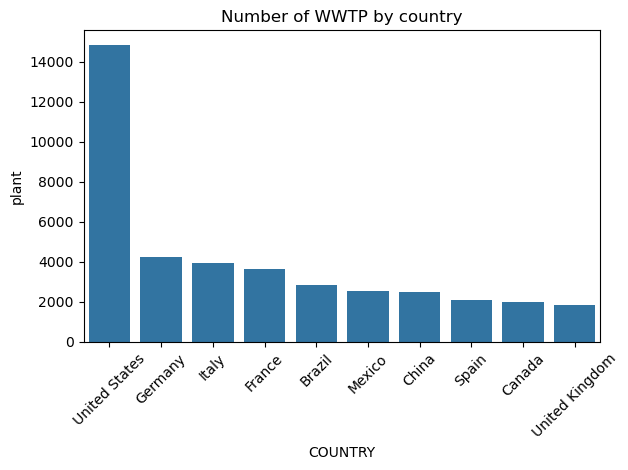

In [557]:
top_10_countries = plantSize.head(10)
sns.barplot(x = "COUNTRY", y = "plant" ,data=top_10_countries)
plt.xticks(rotation=45)
plt.title("Number of WWTP by country")
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.show()

In [558]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return round(outliers.shape[0] / df.shape[0] * 100, 2)  # percentage of outliers

numerical_features = ["POP_SERVED", "QUAL_POP", "WASTE_DIS", "QUAL_WASTE", "DF", "DESIGN_CAP"]
outlier_percentages = {col: str(identify_outliers(df, col)) + "%" for col in numerical_features}
print("Percentage of outliers in key numerical columns:")
print(outlier_percentages)

Percentage of outliers in key numerical columns:
{'POP_SERVED': '15.0%', 'QUAL_POP': '11.36%', 'WASTE_DIS': '14.21%', 'QUAL_WASTE': '0.0%', 'DF': '17.2%', 'DESIGN_CAP': '15.78%'}


In [559]:
df.rename(columns={'SOURCE': 'SOURCE_ID'}, inplace=True)

In [560]:
df.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874.0,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585.0,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105.0,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,Secondary,1,2061.969,20247446.0,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330.0,0.405,0,0,1490.0,2


In [561]:
!pip install cartopy
!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip install contextily

python(34467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


zsh:1: command not found: apt-get


python(34468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(34469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [562]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert latitude and longitude from degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    # Apply the Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['DISTANCE_KM'] = df.apply(lambda row: haversine(row['LAT_WWTP'], row['LON_WWTP'], row['LAT_OUT'], row['LON_OUT']), axis=1)

In [563]:
def categorize_df(x):
    if x > 1000:
        return 'High Dilution'
    elif x >= 100 and x <= 1000:
        return 'Moderate Dilution'
    else:
        return 'Low Dilution'

# Apply the function to segment the DF
df['DF_Segment'] = df['DF'].apply(categorize_df)


In [564]:
# df.drop(columns = "Cluster", inplace=True)

In [565]:
df.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,1,2421.974,20228874.0,4.153,0,0,4600.0,2,6.674966,High Dilution
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,2534.527,20261585.0,257.983,0,0,220000.0,2,10.047347,High Dilution
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,1367.809,20243105.0,30.995,0,0,33000.0,2,7.615488,High Dilution
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,2061.969,20247446.0,13.799,0,0,4357.0,2,4.952657,High Dilution
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,1,209.549,20239330.0,0.405,0,0,1490.0,2,7.189385,Moderate Dilution


In [566]:
df.groupby(by="DF_Segment")[['DISTANCE_KM', "DESIGN_CAP", "QUAL_CAP", "RIVER_DIS", "WASTE_DIS", "QUAL_LEVEL", "POP_SERVED"]].mean()


,DISTANCE_KM,DESIGN_CAP,QUAL_CAP,RIVER_DIS,WASTE_DIS,QUAL_LEVEL,POP_SERVED
DF_Segment,,,,,,,
High Dilution,6.191480,7320.790165,1.813389,928.972499,2592.132731,1.138104,13175.723182
Low Dilution,7.279516,36413.186165,2.058491,4.872843,18628.823607,1.218557,81120.878405
Moderate Dilution,6.444548,19559.412087,2.012260,16.976991,9703.716931,1.208113,41856.752346


In [567]:
df[df.DISTANCE_KM == df.DISTANCE_KM.max()]

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment
5681,5682,1,1285738,GOLFO_PEVERO_LOC_PICCOLO_PEVERO,Italy,ITA,41.117,9.541,2,40.923,...,1,569.6175,20593501.0,6.544,1,1,1600.0,2,21.770739,Moderate Dilution


In [568]:
df[df.DISTANCE_KM == df.DISTANCE_KM.min()].head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment
580,581,1,1141592,UWWTP WILLEMSTAD,Netherlands,NLD,51.690,4.456,2,51.690,...,1,569.6175,20331271.0,6.544,1,1,4140.0,2,0.0,Moderate Dilution
6392,6393,1,1286682,VIA_MAZZINI_PSE_DEP,Italy,ITA,43.231,13.765,2,43.231,...,1,569.6175,20545567.0,6.544,1,1,60000.0,2,0.0,Moderate Dilution
8066,8067,1,1293159,GIJON ESTE,Spain,ESP,43.540,-5.635,2,43.540,...,1,569.6175,20534221.0,6.544,1,1,161800.0,2,0.0,Moderate Dilution
8542,8543,1,1293685,GUARDO,Spain,ESP,42.781,-4.848,2,42.781,...,1,184.2450,20556958.0,7.158,0,0,15850.0,2,0.0,Moderate Dilution
13171,13172,1,1311911,Pranchinha,Portugal,PRT,37.735,-25.648,2,37.735,...,1,569.6175,40182395.0,6.544,0,0,54899.0,2,0.0,Moderate Dilution


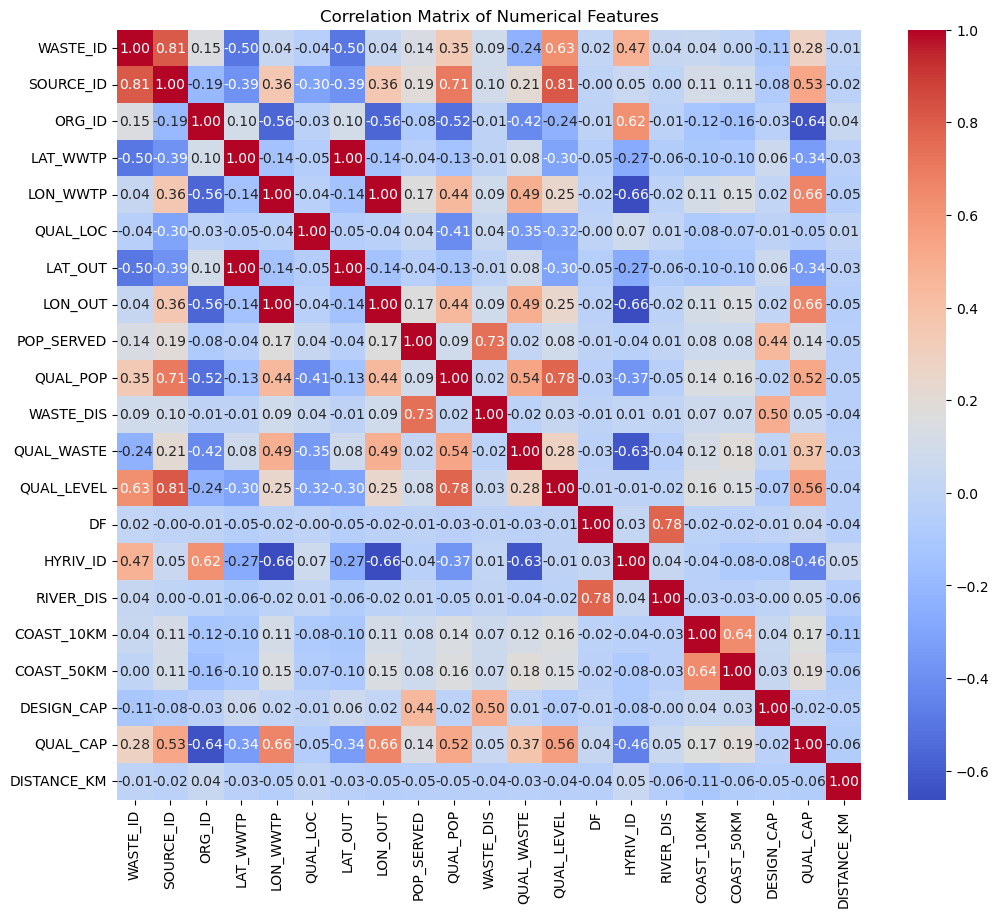

In [569]:
# Select numerical columns for the correlation matrix
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [570]:
numerical_data.head()

,WASTE_ID,SOURCE_ID,ORG_ID,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,LON_OUT,POP_SERVED,QUAL_POP,...,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM
0,1,1,1140441,56.247,22.726,2,56.223,22.627,1060,2,...,4,1,2421.974,20228874.0,4.153,0,0,4600.0,2,6.674966
1,2,1,1140443,54.432,24.056,2,54.519,24.098,87900,2,...,1,1,2534.527,20261585.0,257.983,0,0,220000.0,2,10.047347
2,3,1,1140445,55.509,25.073,2,55.452,25.006,12400,2,...,1,1,1367.809,20243105.0,30.995,0,0,33000.0,2,7.615488
3,4,1,1140447,55.252,23.484,2,55.210,23.510,2500,2,...,1,1,2061.969,20247446.0,13.799,0,0,4357.0,2,4.952657
4,5,1,1140449,55.644,23.741,2,55.681,23.835,1200,2,...,4,1,209.549,20239330.0,0.405,0,0,1490.0,2,7.189385


In [571]:
from sklearn.preprocessing import StandardScaler
# Select latitude and longitude

# Standardize the coordinates
scaler = StandardScaler()
# Select latitude and longitude
coords = numerical_data[['LAT_WWTP', 'LON_WWTP']]

# Standardize the coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [572]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=20)  # Adjust these parameters based on your dataset
clusters = dbscan.fit_predict(coords_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

In [573]:
df.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment,Cluster
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,2421.974,20228874.0,4.153,0,0,4600.0,2,6.674966,High Dilution,0
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,2534.527,20261585.0,257.983,0,0,220000.0,2,10.047347,High Dilution,0
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1367.809,20243105.0,30.995,0,0,33000.0,2,7.615488,High Dilution,0
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,2061.969,20247446.0,13.799,0,0,4357.0,2,4.952657,High Dilution,0
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,209.549,20239330.0,0.405,0,0,1490.0,2,7.189385,Moderate Dilution,0


In [574]:
coords_scaled = df[df["Cluster"] != -1]

In [575]:
coords_scaled

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment,Cluster
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,2421.9740,20228874.0,4.153,0,0,4600.0,2,6.674966,High Dilution,0
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,2534.5270,20261585.0,257.983,0,0,220000.0,2,10.047347,High Dilution,0
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1367.8090,20243105.0,30.995,0,0,33000.0,2,7.615488,High Dilution,0
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,2061.9690,20247446.0,13.799,0,0,4357.0,2,4.952657,High Dilution,0
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,209.5490,20239330.0,0.405,0,0,1490.0,2,7.189385,Moderate Dilution,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58495,58496,12,5646,Jiangsu,Russia,RUS,60.727,114.934,1,60.719,...,903418.5710,30343890.0,4370.627,0,0,4200.0,3,3.172434,High Dilution,0
58498,58499,12,5649,Jiangsu,Kenya,KEN,-0.711,34.823,1,-0.769,...,7.5020,11015070.0,4.467,0,1,4200.0,3,6.609294,Low Dilution,4
58499,58500,12,5650,Jiangsu,Turkey,TUR,37.860,27.842,1,37.798,...,156.9130,20660889.0,48.421,0,0,4200.0,3,7.412228,Moderate Dilution,0
58500,58501,12,5651,Jiangsu,Russia,RUS,60.080,29.949,1,60.090,...,569.6175,20162898.0,6.544,1,1,4200.0,3,2.530979,Moderate Dilution,0


/var/folders/5j/rksnclcn09j1c7_n7bc6nmhr0000gn/T/ipykernel_20040/2807219437.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


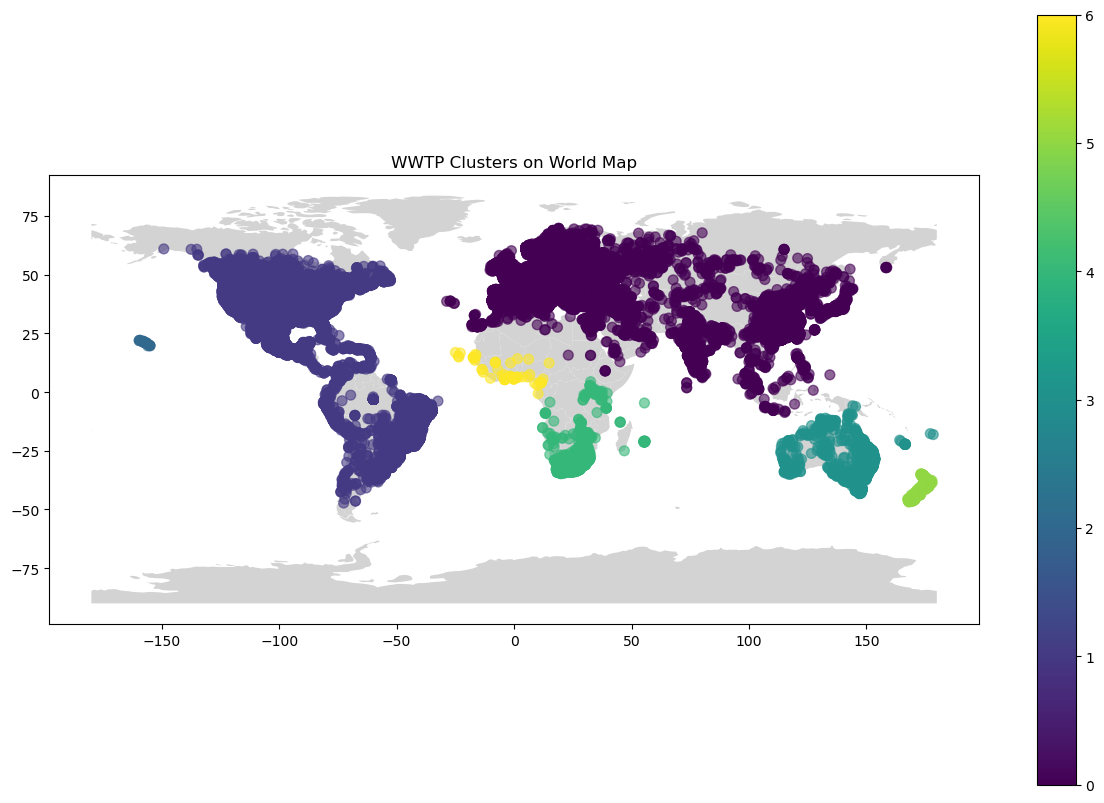

In [576]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(coords_scaled, geometry=gpd.points_from_xy(coords_scaled.LON_WWTP, coords_scaled.LAT_WWTP))

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, column='Cluster', cmap='viridis', legend=True, markersize=50, alpha=0.6)
plt.title('WWTP Clusters on World Map')
plt.show()

In [577]:
subsetDF = df

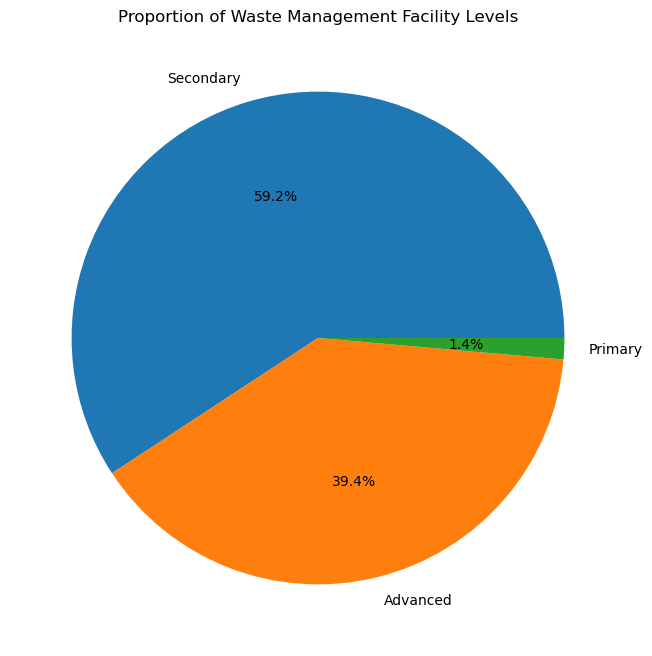

In [578]:
# Pie Chart for a Categorical Variable (e.g., 'LEVEL')
plt.figure(figsize=(8, 8))
subsetDF['LEVEL'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Waste Management Facility Levels')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

In [579]:
subsetDF.drop(columns="Cluster", axis=1)

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,1,2421.9740,20228874.0,4.153,0,0,4600.0,2,6.674966,High Dilution
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,2534.5270,20261585.0,257.983,0,0,220000.0,2,10.047347,High Dilution
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,1367.8090,20243105.0,30.995,0,0,33000.0,2,7.615488,High Dilution
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,2061.9690,20247446.0,13.799,0,0,4357.0,2,4.952657,High Dilution
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,1,209.5490,20239330.0,0.405,0,0,1490.0,2,7.189385,Moderate Dilution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,58498,12,5648,Jiangsu,Russia,RUS,71.640,128.855,1,71.644,...,2,569.6175,30032708.0,6.544,1,1,4200.0,3,0.566107,Moderate Dilution
58498,58499,12,5649,Jiangsu,Kenya,KEN,-0.711,34.823,1,-0.769,...,2,7.5020,11015070.0,4.467,0,1,4200.0,3,6.609294,Low Dilution
58499,58500,12,5650,Jiangsu,Turkey,TUR,37.860,27.842,1,37.798,...,2,156.9130,20660889.0,48.421,0,0,4200.0,3,7.412228,Moderate Dilution
58500,58501,12,5651,Jiangsu,Russia,RUS,60.080,29.949,1,60.090,...,2,569.6175,20162898.0,6.544,1,1,4200.0,3,2.530979,Moderate Dilution


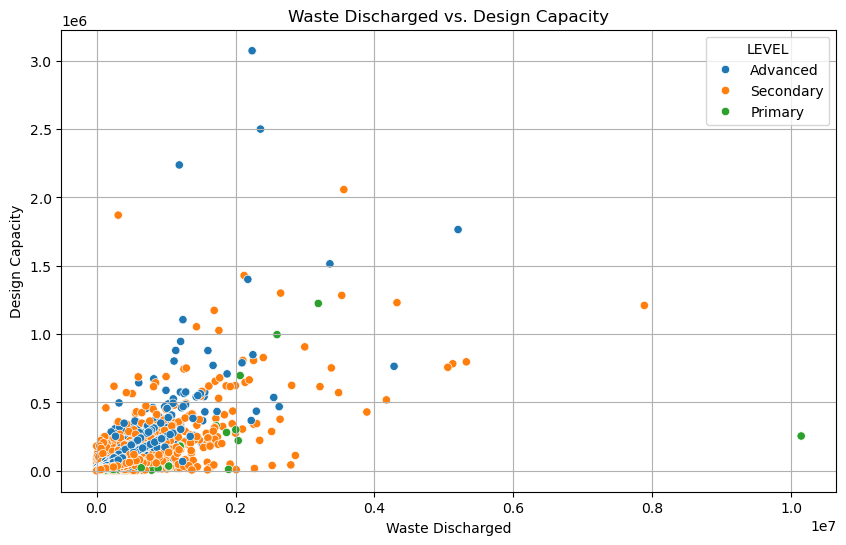

In [580]:
# Scatter Plot for Two Numerical Variables (e.g., 'POP_SERVED' vs. 'DESIGN_CAP')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subsetDF.POP_SERVED, y=subsetDF.WASTE_DIS, hue = subsetDF.LEVEL)
plt.title('Waste Discharged vs. Design Capacity')
plt.xlabel('Waste Discharged')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

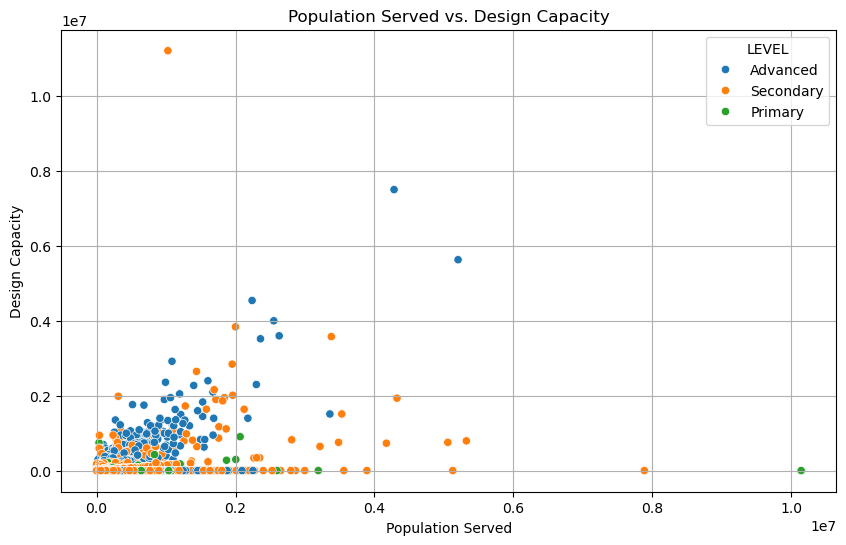

In [581]:
# Scatter Plot for Two Numerical Variables (e.g., 'POP_SERVED' vs. 'DESIGN_CAP')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subsetDF.POP_SERVED, y=subsetDF.DESIGN_CAP, hue = subsetDF.LEVEL)
plt.title('Population Served vs. Design Capacity')
plt.xlabel('Population Served')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

In [582]:
subsetDF['WASTE_RATIO'] = subsetDF['WASTE_DIS'] / subsetDF['POP_SERVED']

In [583]:
subsetDF.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,DF_Segment,Cluster,WASTE_RATIO
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,20228874.0,4.153,0,0,4600.0,2,6.674966,High Dilution,0,0.139824
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,20261585.0,257.983,0,0,220000.0,2,10.047347,High Dilution,0,0.100090
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,20243105.0,30.995,0,0,33000.0,2,7.615488,High Dilution,0,0.158007
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,20247446.0,13.799,0,0,4357.0,2,4.952657,High Dilution,0,0.231393
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,20239330.0,0.405,0,0,1490.0,2,7.189385,Moderate Dilution,0,0.139823


In [584]:
subsetDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57605 entries, 0 to 58501
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WASTE_ID     57605 non-null  int64  
 1   SOURCE_ID    57605 non-null  int64  
 2   ORG_ID       57605 non-null  int64  
 3   WWTP_NAME    57605 non-null  object 
 4   COUNTRY      57605 non-null  object 
 5   CNTRY_ISO    57605 non-null  object 
 6   LAT_WWTP     57605 non-null  float64
 7   LON_WWTP     57605 non-null  float64
 8   QUAL_LOC     57605 non-null  int64  
 9   LAT_OUT      57605 non-null  float64
 10  LON_OUT      57605 non-null  float64
 11  STATUS       57605 non-null  object 
 12  POP_SERVED   57605 non-null  int64  
 13  QUAL_POP     57605 non-null  int64  
 14  WASTE_DIS    57605 non-null  float64
 15  QUAL_WASTE   57605 non-null  int64  
 16  LEVEL        57605 non-null  object 
 17  QUAL_LEVEL   57605 non-null  int64  
 18  DF           57605 non-null  float64
 19  HYRIV_ID 

In [585]:
subsetDF.isna().sum()

WASTE_ID       0
SOURCE_ID      0
ORG_ID         0
WWTP_NAME      0
COUNTRY        0
CNTRY_ISO      0
LAT_WWTP       0
LON_WWTP       0
QUAL_LOC       0
LAT_OUT        0
LON_OUT        0
STATUS         0
POP_SERVED     0
QUAL_POP       0
WASTE_DIS      0
QUAL_WASTE     0
LEVEL          0
QUAL_LEVEL     0
DF             0
HYRIV_ID       0
RIVER_DIS      0
COAST_10KM     0
COAST_50KM     0
DESIGN_CAP     0
QUAL_CAP       0
DISTANCE_KM    0
DF_Segment     0
Cluster        0
WASTE_RATIO    0
dtype: int64

In [586]:
subsetDF.describe()

,WASTE_ID,SOURCE_ID,ORG_ID,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,LON_OUT,POP_SERVED,QUAL_POP,...,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP,DISTANCE_KM,Cluster,WASTE_RATIO
count,57605.000000,57605.000000,5.760500e+04,57605.000000,57605.000000,57605.000000,57605.000000,57605.000000,5.760500e+04,57605.000000,...,5.760500e+04,5.760500e+04,57605.000000,57605.000000,57605.000000,5.760500e+04,57605.000000,57605.000000,57605.000000,57605.000000
mean,29462.284541,3.272147,7.712477e+09,35.027897,-14.958894,2.032202,35.025029,-14.957582,3.988528e+04,1.984185,...,2.171852e+05,4.217668e+07,326.260959,0.177710,0.330891,1.873794e+04,1.953511,6.524585,0.572815,0.471682
std,16800.729448,3.393439,1.511054e+10,22.450592,67.892444,0.639439,22.450834,67.891936,1.547963e+05,0.959211,...,6.094834e+06,2.323483e+07,4722.183618,0.382272,0.470538,1.047246e+05,0.762821,3.124317,0.864489,10.411933
min,1.000000,1.000000,1.000000e+00,-54.788000,-175.302000,1.000000,-54.798000,-175.302000,1.000000e+00,1.000000,...,1.000000e+00,1.000001e+07,0.001000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,-1.000000,0.000000
25%,14973.000000,1.000000,3.925000e+03,33.343000,-81.917000,2.000000,33.319000,-81.927000,1.497000e+03,1.000000,...,1.578820e+02,2.041299e+07,2.316000,0.000000,0.000000,2.250000e+03,1.000000,3.971508,0.000000,0.144750
50%,29558.000000,2.000000,1.296567e+06,41.628000,1.571000,2.000000,41.606000,1.556000,4.803000e+03,2.000000,...,5.696175e+02,4.030982e+07,6.544000,0.000000,0.000000,4.200000e+03,2.000000,7.039793,0.000000,0.208197
75%,43959.000000,4.000000,4.002701e+09,48.388000,16.578000,2.000000,48.385000,16.610000,2.042300e+04,2.000000,...,2.353154e+03,7.050278e+07,24.156000,0.000000,1.000000,8.517150e+03,3.000000,9.221811,1.000000,0.377247
max,58502.000000,12.000000,7.800000e+10,71.640000,178.482000,4.000000,71.644000,178.427000,1.014613e+07,4.000000,...,4.830619e+08,8.032324e+07,127105.248000,1.000000,1.000000,1.120625e+07,3.000000,21.770739,6.000000,2000.000000


In [587]:
subsetDF.columns

Index(['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO',
       'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL',
       'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_10KM', 'COAST_50KM',
       'DESIGN_CAP', 'QUAL_CAP', 'DISTANCE_KM', 'DF_Segment', 'Cluster',
       'WASTE_RATIO'],
      dtype='object')

In [588]:
numerical_data = subsetDF.select_dtypes(include=['float64', 'int64'])
numerical_data.columns

Index(['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC',
       'LAT_OUT', 'LON_OUT', 'POP_SERVED', 'QUAL_POP', 'WASTE_DIS',
       'QUAL_WASTE', 'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_10KM',
       'COAST_50KM', 'DESIGN_CAP', 'QUAL_CAP', 'DISTANCE_KM', 'Cluster',
       'WASTE_RATIO'],
      dtype='object')

In [589]:
id_columns = [col for col in subsetDF.columns if col.endswith('ID') ]
id_columns

['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'HYRIV_ID']

In [590]:
numerical_columns = numerical_data.columns.difference(id_columns)
numerical_data = subsetDF[numerical_columns]

In [591]:
categorical_columns = subsetDF.select_dtypes(exclude=['int64', 'float64']).columns.union(id_columns)
categorical_data = subsetDF[categorical_columns]

In [592]:
categorical_data.head()

,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
0,LTU,Lithuania,High Dilution,20228874.0,Advanced,1140441,1,Not Reported,1,Akmenes aglomeracija
1,LTU,Lithuania,High Dilution,20261585.0,Advanced,1140443,1,Not Reported,2,Alytaus m aglomeracija
2,LTU,Lithuania,High Dilution,20243105.0,Advanced,1140445,1,Not Reported,3,Anyksciu aglomeracija
3,LTU,Lithuania,High Dilution,20247446.0,Secondary,1140447,1,Not Reported,4,Ariogalos aglomeracija
4,LTU,Lithuania,Moderate Dilution,20239330.0,Secondary,1140449,1,Not Reported,5,Baisogalos aglomeracija


In [593]:
numerical_data.head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,POP_SERVED,QUAL_CAP,QUAL_LEVEL,QUAL_LOC,QUAL_POP,QUAL_WASTE,RIVER_DIS,WASTE_DIS,WASTE_RATIO
0,0,0,0,4600.0,2421.974,6.674966,56.223,56.247,22.627,22.726,1060,2,1,2,2,4,4.153,148.213,0.139824
1,0,0,0,220000.0,2534.527,10.047347,54.519,54.432,24.098,24.056,87900,2,1,2,2,1,257.983,8797.904,0.100090
2,0,0,0,33000.0,1367.809,7.615488,55.452,55.509,25.006,25.073,12400,2,1,2,2,1,30.995,1959.285,0.158007
3,0,0,0,4357.0,2061.969,4.952657,55.210,55.252,23.510,23.484,2500,2,1,2,2,1,13.799,578.482,0.231393
4,0,0,0,1490.0,209.549,7.189385,55.681,55.644,23.835,23.741,1200,2,1,2,2,4,0.405,167.788,0.139823


In [594]:
numerical_data.columns

Index(['COAST_10KM', 'COAST_50KM', 'Cluster', 'DESIGN_CAP', 'DF',
       'DISTANCE_KM', 'LAT_OUT', 'LAT_WWTP', 'LON_OUT', 'LON_WWTP',
       'POP_SERVED', 'QUAL_CAP', 'QUAL_LEVEL', 'QUAL_LOC', 'QUAL_POP',
       'QUAL_WASTE', 'RIVER_DIS', 'WASTE_DIS', 'WASTE_RATIO'],
      dtype='object')

In [595]:
numerical_data.QUAL_POP.value_counts()

QUAL_POP
2    24216
1    20421
4     6542
3     6426
Name: count, dtype: int64

In [596]:
numerical_data.QUAL_WASTE.value_counts()

QUAL_WASTE
1    33672
4    22219
3      912
2      802
Name: count, dtype: int64

In [597]:
numerical_data.QUAL_LEVEL.value_counts()

QUAL_LEVEL
1    46875
2    10730
Name: count, dtype: int64

In [598]:
numerical_data.QUAL_LOC.value_counts()

QUAL_LOC
2    44186
1     7481
4     3398
3     2540
Name: count, dtype: int64

In [599]:
subsetDF.shape

(57605, 29)

In [600]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

python(34499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [601]:
scaler = StandardScaler()

# Fit and transform the numerical data
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Convert the scaled data back to a DataFrame
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns, index=numerical_data.index)

In [602]:
numerical_data_scaled.head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,POP_SERVED,QUAL_CAP,QUAL_LEVEL,QUAL_LOC,QUAL_POP,QUAL_WASTE,RIVER_DIS,WASTE_DIS,WASTE_RATIO
0,-0.464883,-0.703225,-0.662611,-0.135002,-0.035237,0.048133,0.944203,0.945155,0.553599,0.555072,-0.250817,0.060944,-0.478442,-0.05036,0.016487,1.239612,-0.068212,-0.197809,-0.031873
1,-0.464883,-0.703225,-0.662611,1.921840,-0.035219,1.127540,0.868304,0.864310,0.575266,0.574662,0.310183,0.060944,-0.478442,-0.05036,0.016487,-0.829541,-0.014459,-0.005671,-0.035689
2,-0.464883,-0.703225,-0.662611,0.136188,-0.035410,0.349168,0.909861,0.912282,0.588640,0.589642,-0.177559,0.060944,-0.478442,-0.05036,0.016487,-0.829541,-0.062528,-0.157579,-0.030127
3,-0.464883,-0.703225,-0.662611,-0.137323,-0.035296,-0.503131,0.899082,0.900835,0.566605,0.566237,-0.241515,0.060944,-0.478442,-0.05036,0.016487,-0.829541,-0.066170,-0.188251,-0.023078
4,-0.464883,-0.703225,-0.662611,-0.164700,-0.035600,0.212784,0.920062,0.918296,0.571392,0.570023,-0.249913,0.060944,-0.478442,-0.05036,0.016487,1.239612,-0.069006,-0.197374,-0.031873


In [603]:

data_scaled = pd.concat([numerical_data_scaled, categorical_data], axis=1)
data_scaled.head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
0,-0.464883,-0.703225,-0.662611,-0.135002,-0.035237,0.048133,0.944203,0.945155,0.553599,0.555072,...,LTU,Lithuania,High Dilution,20228874.0,Advanced,1140441,1,Not Reported,1,Akmenes aglomeracija
1,-0.464883,-0.703225,-0.662611,1.921840,-0.035219,1.127540,0.868304,0.864310,0.575266,0.574662,...,LTU,Lithuania,High Dilution,20261585.0,Advanced,1140443,1,Not Reported,2,Alytaus m aglomeracija
2,-0.464883,-0.703225,-0.662611,0.136188,-0.035410,0.349168,0.909861,0.912282,0.588640,0.589642,...,LTU,Lithuania,High Dilution,20243105.0,Advanced,1140445,1,Not Reported,3,Anyksciu aglomeracija
3,-0.464883,-0.703225,-0.662611,-0.137323,-0.035296,-0.503131,0.899082,0.900835,0.566605,0.566237,...,LTU,Lithuania,High Dilution,20247446.0,Secondary,1140447,1,Not Reported,4,Ariogalos aglomeracija
4,-0.464883,-0.703225,-0.662611,-0.164700,-0.035600,0.212784,0.920062,0.918296,0.571392,0.570023,...,LTU,Lithuania,Moderate Dilution,20239330.0,Secondary,1140449,1,Not Reported,5,Baisogalos aglomeracija


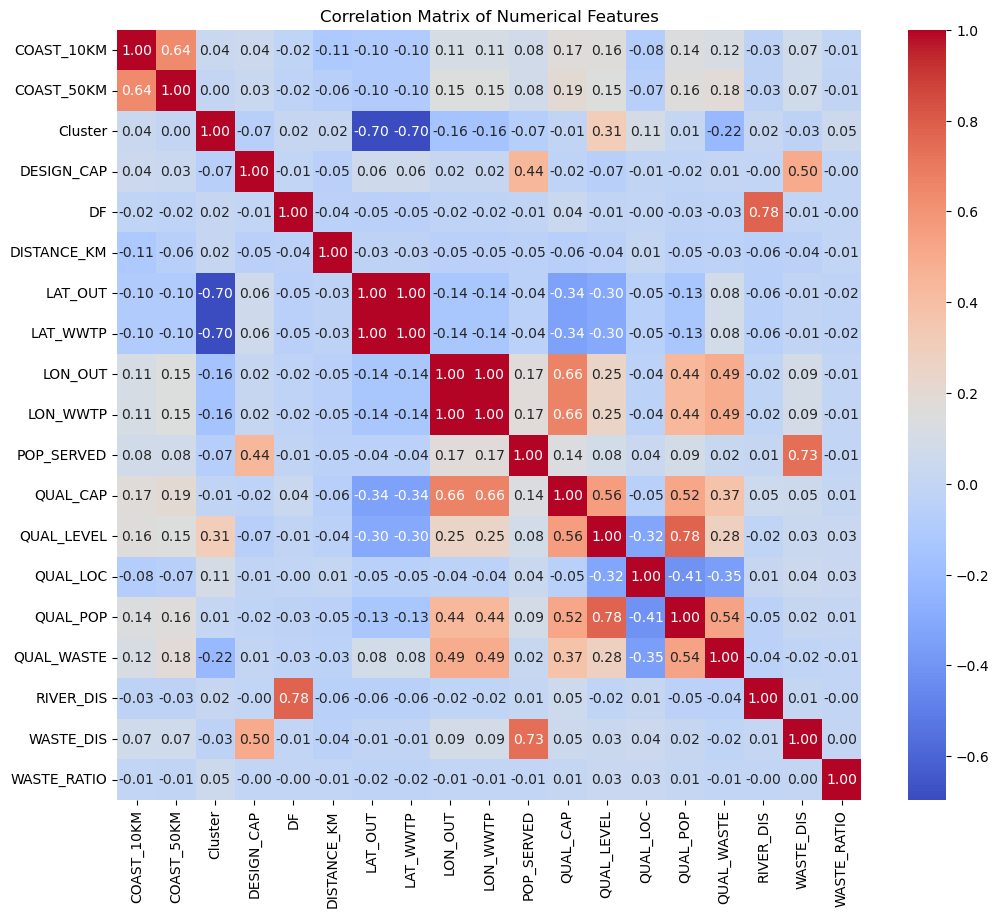

In [604]:
# Compute the correlation matrix
corr_matrix = numerical_data_scaled.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [605]:
data_scaled[["QUAL_CAP", "DESIGN_CAP"]]

,QUAL_CAP,DESIGN_CAP
0,0.060944,-0.135002
1,0.060944,1.921840
2,0.060944,0.136188
3,0.060944,-0.137323
4,0.060944,-0.164700
...,...,...
58497,1.371880,-0.138822
58498,1.371880,-0.138822
58499,1.371880,-0.138822
58500,1.371880,-0.138822


In [606]:
df[df.DF == df.DF.max()][["WASTE_DIS", "RIVER_DIS", "POP_SERVED"]].max()

WASTE_DIS         22.734
RIVER_DIS     127105.248
POP_SERVED       190.000
dtype: float64

In [607]:
data_scaled.isna().sum()

COAST_10KM     0
COAST_50KM     0
Cluster        0
DESIGN_CAP     0
DF             0
DISTANCE_KM    0
LAT_OUT        0
LAT_WWTP       0
LON_OUT        0
LON_WWTP       0
POP_SERVED     0
QUAL_CAP       0
QUAL_LEVEL     0
QUAL_LOC       0
QUAL_POP       0
QUAL_WASTE     0
RIVER_DIS      0
WASTE_DIS      0
WASTE_RATIO    0
CNTRY_ISO      0
COUNTRY        0
DF_Segment     0
HYRIV_ID       0
LEVEL          0
ORG_ID         0
SOURCE_ID      0
STATUS         0
WASTE_ID       0
WWTP_NAME      0
dtype: int64

In [608]:
!pip install scipy

python(34500) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [609]:
numerical_features = data_scaled.select_dtypes(include=['float64', 'int64'])
numerical_features = numerical_features[numerical_columns]

In [610]:
numerical_imp_features = ['WASTE_DIS', 'POP_SERVED']
numericalData = numerical_features[numerical_imp_features]

In [611]:
numericalData

,WASTE_DIS,POP_SERVED
0,-0.197809,-0.250817
1,-0.005671,0.310183
2,-0.157579,-0.177559
3,-0.188251,-0.241515
4,-0.197374,-0.249913
...,...,...
58497,-0.199908,-0.254978
58498,0.559684,1.666292
58499,0.394942,1.312398
58500,-0.081088,0.012951


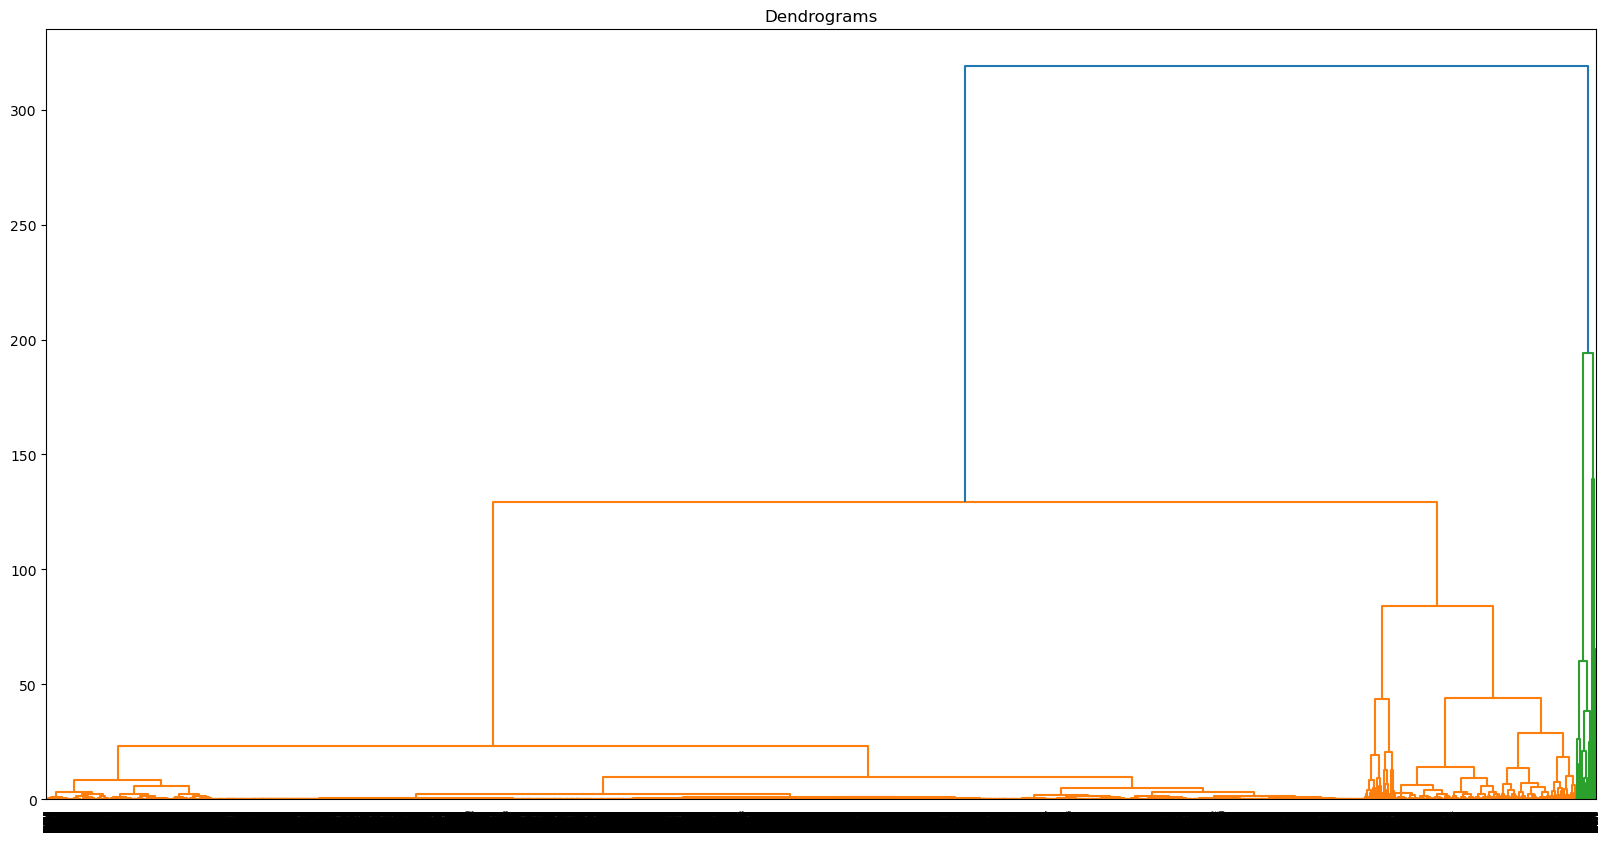

In [612]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(numericalData, method='ward'))

In [620]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(numericalData)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [623]:
data_scaled["Cluster"] = cluster_labels

In [625]:
data_scaled["Cluster"].value_counts()

Cluster
0    56877
2      580
1      135
3       13
Name: count, dtype: int64

In [626]:
data_scaled[["POP_SERVED", "WASTE_DIS", "Cluster"]]

,POP_SERVED,WASTE_DIS,Cluster
0,-0.250817,-0.197809,0
1,0.310183,-0.005671,0
2,-0.177559,-0.157579,0
3,-0.241515,-0.188251,0
4,-0.249913,-0.197374,0
...,...,...,...
58497,-0.254978,-0.199908,0
58498,1.666292,0.559684,0
58499,1.312398,0.394942,0
58500,0.012951,-0.081088,0


In [627]:
data_scaled[data_scaled["Cluster"] == 2].head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
71,-0.464883,-0.703225,2,6.887289,-0.035154,-0.625616,54.677,54.679,25.090,25.161,...,LTU,Lithuania,High Dilution,20257304.0,Advanced,1140534,1,Not Reported,72,Vilniaus m aglomeracija
89,2.151078,1.422019,2,4.118096,-0.035541,0.221141,59.435,59.480,24.577,24.669,...,EST,Estonia,Moderate Dilution,20173503.0,Advanced,1140614,1,Not Reported,90,Tallinna reoveepuhastusjaam
376,-0.464883,1.422019,2,6.823502,-0.035634,-0.753687,52.419,52.400,4.840,4.787,...,NLD,Netherlands,Low Dilution,20311526.0,Advanced,1141387,1,Not Reported,377,UWWTP AMSTERDAM WEST
446,2.151078,1.422019,2,7.126012,-0.035541,0.451753,51.977,52.017,4.223,4.319,...,NLD,Netherlands,Moderate Dilution,20323929.0,Advanced,1141457,1,Not Reported,447,UWWTP HARNASCHPOLDER
1034,2.151078,1.422019,2,-0.178927,-0.035541,-2.008802,60.090,60.088,24.910,24.912,...,FIN,Finland,Moderate Dilution,40182395.0,Advanced,1142195,1,Not Reported,1035,TP 101 of Helsingin kt


In [731]:
data_scaled["Cluster"] = target

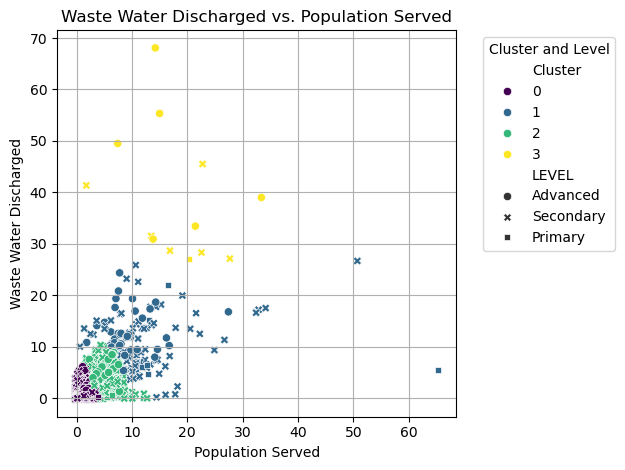

In [732]:
sns.scatterplot(x="POP_SERVED", y="WASTE_DIS", hue="Cluster", style="LEVEL",
                palette="viridis", data=data_scaled)

plt.title('Waste Water Discharged vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Waste Water Discharged')
plt.grid(True)  # 'True' is more conventional than passing just 'plt.grid()'
plt.legend(title='Cluster and Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [733]:
data_scaled[data_scaled["Cluster"] == 3]

,COAST_10KM,COAST_50KM,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,POP_SERVED,...,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME,Cluster
7788,2.151078,1.422019,15.481336,-0.035541,1.186043,53.252,53.341,-6.144,-6.183,13.464638,...,Ireland,Moderate Dilution,20289658.0,Secondary,1290318,1,Not Reported,7789,Ringsend Waste Water Treatment Plant,3
14325,2.151078,1.422019,53.581611,-0.035541,0.801167,38.019,37.938,23.594,23.587,33.368098,...,Greece,Moderate Dilution,20656206.0,Advanced,1317354,1,Not Reported,14326,PSYTTALIA,3
25942,2.151078,1.422019,14.279697,-0.035541,0.828449,33.723,33.804,-118.269,-118.284,22.547464,...,United States,Moderate Dilution,70726662.0,Secondary,6004009001,2,Not Reported,25943,Joint WPCP,3
25953,2.151078,1.422019,18.310039,-0.035541,-0.682500,33.969,33.931,-118.448,-118.435,27.684542,...,United States,Moderate Dilution,70720758.0,Secondary,6004010001,2,Not Reported,25954,Hyperion WWTP,3
26637,2.151078,1.422019,13.195300,-0.035541,0.519225,38.748,38.821,-77.010,-77.018,13.811891,...,United States,Moderate Dilution,70600814.0,Advanced,11000001001,2,Not Reported,26638,BLUE PLAINS STP,3
27786,-0.464883,1.422019,43.196946,-0.035634,0.988975,41.756,41.814,-87.856,-87.770,14.205037,...,United States,Low Dilution,70522269.0,Advanced,17000721001,2,Not Reported,27787,Stickney Treatment Plant MWRDGC,3
30966,-0.464883,1.422019,33.437375,-0.035582,-1.385853,42.273,42.283,-83.106,-83.129,14.986309,...,United States,Moderate Dilution,70507605.0,Advanced,26000596001,2,Not Reported,30967,DETROIT STP,3
33148,-0.464883,1.422019,14.279697,-0.035634,-0.490750,36.144,36.100,-115.044,-115.033,21.444586,...,United States,Low Dilution,70665988.0,Advanced,32000200801,2,Projected,33149,SCOP,3
44900,-0.464883,-0.703225,18.796728,-0.035634,1.299656,20.102,20.008,-99.235,-99.219,1.750520,...,Mexico,Low Dilution,70883160.0,Secondary,4176,4,Not Reported,44901,Atotonilco de Tula,3
45740,2.151078,1.422019,-0.138822,-0.035541,-0.046857,31.331,31.355,121.660,121.599,16.861751,...,China,Moderate Dilution,40635063.0,Secondary,602,5,Not Reported,45741,Shanghai,3


In [629]:
numerical_data.shape

(57605, 19)

In [630]:
data_scaled[["LAT_OUT", "LAT_WWTP", "LON_OUT", "LON_WWTP"]] = numerical_data[["LAT_OUT", "LAT_WWTP", "LON_OUT", "LON_WWTP"]]

In [631]:
data_scaled

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
0,-0.464883,-0.703225,0,-0.135002,-0.035237,0.048133,56.223,56.247,22.627,22.726,...,LTU,Lithuania,High Dilution,20228874.0,Advanced,1140441,1,Not Reported,1,Akmenes aglomeracija
1,-0.464883,-0.703225,0,1.921840,-0.035219,1.127540,54.519,54.432,24.098,24.056,...,LTU,Lithuania,High Dilution,20261585.0,Advanced,1140443,1,Not Reported,2,Alytaus m aglomeracija
2,-0.464883,-0.703225,0,0.136188,-0.035410,0.349168,55.452,55.509,25.006,25.073,...,LTU,Lithuania,High Dilution,20243105.0,Advanced,1140445,1,Not Reported,3,Anyksciu aglomeracija
3,-0.464883,-0.703225,0,-0.137323,-0.035296,-0.503131,55.210,55.252,23.510,23.484,...,LTU,Lithuania,High Dilution,20247446.0,Secondary,1140447,1,Not Reported,4,Ariogalos aglomeracija
4,-0.464883,-0.703225,0,-0.164700,-0.035600,0.212784,55.681,55.644,23.835,23.741,...,LTU,Lithuania,Moderate Dilution,20239330.0,Secondary,1140449,1,Not Reported,5,Baisogalos aglomeracija
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,2.151078,1.422019,0,-0.138822,-0.035541,-1.907146,71.644,71.640,128.865,128.855,...,RUS,Russia,Moderate Dilution,30032708.0,Secondary,5648,12,Not Reported,58498,Jiangsu
58498,-0.464883,1.422019,0,-0.138822,-0.035633,0.027113,-0.769,-0.711,34.810,34.823,...,KEN,Kenya,Low Dilution,11015070.0,Secondary,5649,12,Not Reported,58499,Jiangsu
58499,-0.464883,-0.703225,0,-0.138822,-0.035609,0.284110,37.798,37.860,27.873,27.842,...,TUR,Turkey,Moderate Dilution,20660889.0,Secondary,5650,12,Not Reported,58500,Jiangsu
58500,2.151078,1.422019,0,-0.138822,-0.035541,-1.278245,60.090,60.080,29.990,29.949,...,RUS,Russia,Moderate Dilution,20162898.0,Secondary,5651,12,Not Reported,58501,Jiangsu


In [632]:
wwtp_usa = data_scaled[data_scaled.COUNTRY == "United States"]
wwtp_usa.head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
24971,-0.464883,-0.703225,0,-0.174951,-0.017354,-1.158885,32.906,32.886,-87.760,-87.740,...,USA,United States,High Dilution,70745431.0,Secondary,1000002001,2,Not Reported,24972,AKRON LAGOON
24972,-0.464883,-0.703225,0,0.095786,-0.035614,0.342310,33.310,33.253,-86.860,-86.815,...,USA,United States,Moderate Dilution,70736924.0,Advanced,1000003001,2,Not Reported,24973,ALABASTER WWTP
24973,-0.464883,-0.703225,0,0.128318,-0.035548,0.189034,32.852,32.901,-85.902,-85.951,...,USA,United States,Moderate Dilution,70747012.0,Advanced,1000004001,2,Not Reported,24974,ALEXANDER CITY SUGAR CREEK WWTP
24974,-0.464883,-0.703225,0,-0.108442,-0.035320,0.612322,32.856,32.930,-85.902,-85.882,...,USA,United States,High Dilution,70747012.0,Secondary,1000004002,2,Not Reported,24975,ALEXANDER CITY COLEY CREEK WWTP
24975,-0.464883,-0.703225,0,-0.176397,-0.035385,1.169943,34.106,34.038,-86.406,-86.332,...,USA,United States,High Dilution,70718545.0,Secondary,1000005001,2,Not Reported,24976,ALTOONA LAGOON


In [762]:
wwtp_usa["Cluster"].value_counts()

Cluster
0    14727
2       55
1       31
3        6
Name: count, dtype: int64

In [763]:
avg_waste_ratio_usa = wwtp_usa['WASTE_RATIO'].mean(skipna=True)

In [764]:
# Load countries data from Natural Earth through GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Select only the 'name', 'continent', and 'geometry' columns
world = world[['name', 'continent', 'geometry']]

# Filter for USA
usa_boundry = world[world['name'] == "United States of America"]

# Display the result
usa_boundry

/var/folders/5j/rksnclcn09j1c7_n7bc6nmhr0000gn/T/ipykernel_20040/3159816377.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,name,continent,geometry
4,United States of America,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [765]:
gdf = gpd.GeoDataFrame(wwtp_usa, geometry=gpd.points_from_xy(wwtp_usa.LON_WWTP, wwtp_usa.LAT_WWTP), crs="EPSG:4326")
gdf.head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME,geometry
24971,-0.464883,-0.703225,0,-0.174951,-0.017354,-1.158885,32.906,32.886,-87.760,-87.740,...,United States,High Dilution,70745431.0,Secondary,1000002001,2,Not Reported,24972,AKRON LAGOON,POINT (-87.74000 32.88600)
24972,-0.464883,-0.703225,0,0.095786,-0.035614,0.342310,33.310,33.253,-86.860,-86.815,...,United States,Moderate Dilution,70736924.0,Advanced,1000003001,2,Not Reported,24973,ALABASTER WWTP,POINT (-86.81500 33.25300)
24973,-0.464883,-0.703225,0,0.128318,-0.035548,0.189034,32.852,32.901,-85.902,-85.951,...,United States,Moderate Dilution,70747012.0,Advanced,1000004001,2,Not Reported,24974,ALEXANDER CITY SUGAR CREEK WWTP,POINT (-85.95100 32.90100)
24974,-0.464883,-0.703225,0,-0.108442,-0.035320,0.612322,32.856,32.930,-85.902,-85.882,...,United States,High Dilution,70747012.0,Secondary,1000004002,2,Not Reported,24975,ALEXANDER CITY COLEY CREEK WWTP,POINT (-85.88200 32.93000)
24975,-0.464883,-0.703225,0,-0.176397,-0.035385,1.169943,34.106,34.038,-86.406,-86.332,...,United States,High Dilution,70718545.0,Secondary,1000005001,2,Not Reported,24976,ALTOONA LAGOON,POINT (-86.33200 34.03800)


In [766]:
gdf_us = gdf[gdf.COUNTRY == "United States"]
gdf_us

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME,geometry
24971,-0.464883,-0.703225,0,-0.174951,-0.017354,-1.158885,32.906,32.886,-87.760,-87.740,...,United States,High Dilution,70745431.0,Secondary,1000002001,2,Not Reported,24972,AKRON LAGOON,POINT (-87.74000 32.88600)
24972,-0.464883,-0.703225,0,0.095786,-0.035614,0.342310,33.310,33.253,-86.860,-86.815,...,United States,Moderate Dilution,70736924.0,Advanced,1000003001,2,Not Reported,24973,ALABASTER WWTP,POINT (-86.81500 33.25300)
24973,-0.464883,-0.703225,0,0.128318,-0.035548,0.189034,32.852,32.901,-85.902,-85.951,...,United States,Moderate Dilution,70747012.0,Advanced,1000004001,2,Not Reported,24974,ALEXANDER CITY SUGAR CREEK WWTP,POINT (-85.95100 32.90100)
24974,-0.464883,-0.703225,0,-0.108442,-0.035320,0.612322,32.856,32.930,-85.902,-85.882,...,United States,High Dilution,70747012.0,Secondary,1000004002,2,Not Reported,24975,ALEXANDER CITY COLEY CREEK WWTP,POINT (-85.88200 32.93000)
24975,-0.464883,-0.703225,0,-0.176397,-0.035385,1.169943,34.106,34.038,-86.406,-86.332,...,United States,High Dilution,70718545.0,Secondary,1000005001,2,Not Reported,24976,ALTOONA LAGOON,POINT (-86.33200 34.03800)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39785,2.151078,1.422019,0,0.121089,-0.035541,-0.298327,18.123,18.157,-65.781,-65.820,...,United States,Moderate Dilution,70904574.0,Secondary,72000006001,2,Not Reported,39786,Humacao Regional WWTP,POINT (-65.82000 18.15700)
39786,2.151078,1.422019,0,0.153621,-0.035541,1.201985,18.373,18.455,-65.710,-65.665,...,United States,Moderate Dilution,70900694.0,Secondary,72000006002,2,Not Reported,39787,Fajardo Regional WWTP,POINT (-65.66500 18.45500)
39787,-0.464883,1.422019,0,0.688590,-0.035632,-1.676566,18.260,18.262,-66.015,-66.027,...,United States,Low Dilution,70902150.0,Secondary,72000006003,2,Not Reported,39788,Caguas Regional WWTP,POINT (-66.02700 18.26200)
39788,2.151078,1.422019,0,-0.160854,-0.035541,-0.941438,18.098,18.130,-65.456,-65.452,...,United States,Moderate Dilution,70905008.0,Secondary,72000006004,2,Not Reported,39789,Vieques WWTP,POINT (-65.45200 18.13000)


In [792]:
gdf_usa = gdf_us[["LAT_WWTP", "LON_WWTP", "Cluster", "WWTP_NAME", "POP_SERVED", "WASTE_DIS", "RIVER_DIS", "DF", "DESIGN_CAP"]]

In [793]:
gdf_usa.Cluster.value_counts()

Cluster
0    14727
2       55
1       31
3        6
Name: count, dtype: int64

In [794]:
gdf_usa.groupby(by = "Cluster")[["POP_SERVED", "WASTE_DIS", "RIVER_DIS", "DF", "DESIGN_CAP"]].mean()

,POP_SERVED,WASTE_DIS,RIVER_DIS,DF,DESIGN_CAP
Cluster,,,,,
0,-0.185845,-0.081271,-0.025733,-0.023462,-0.097705
1,8.436885,14.764132,-0.018838,-0.035575,8.520034
2,3.810568,6.192387,0.095670,-0.035556,3.855712
3,19.113305,40.531746,0.259441,-0.035579,22.783176


In [795]:
gdf_usa.duplicated().sum()

0

In [796]:
gdf_usa.drop_duplicates(inplace=True)

/var/folders/5j/rksnclcn09j1c7_n7bc6nmhr0000gn/T/ipykernel_20040/545552461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_usa.drop_duplicates(inplace=True)


In [797]:
gdf_usa.head()

,LAT_WWTP,LON_WWTP,Cluster,WWTP_NAME,POP_SERVED,WASTE_DIS,RIVER_DIS,DF,DESIGN_CAP
24971,32.886,-87.740,0,AKRON LAGOON,-0.255365,-0.196056,-0.007068,-0.017354,-0.174951
24972,33.253,-86.815,0,ALABASTER WWTP,-0.058692,0.051158,-0.065625,-0.035614,0.095786
24973,32.901,-85.951,0,ALEXANDER CITY SUGAR CREEK WWTP,-0.178845,0.194105,-0.046027,-0.035548,0.128318
24974,32.930,-85.882,0,ALEXANDER CITY COLEY CREEK WWTP,-0.178845,-0.074131,-0.042259,-0.035320,-0.108442
24975,34.038,-86.332,0,ALTOONA LAGOON,-0.253880,-0.199672,-0.068852,-0.035385,-0.176397


In [798]:
cluster_analysis_usa = gdf_usa.groupby(by="Cluster")[["WASTE_DIS", "POP_SERVED", "DESIGN_CAP", "RIVER_DIS", "DF"]].mean()
cluster_analysis_usa['WWTP_Count'] = gdf_usa.groupby(by="Cluster")["WWTP_NAME"].count()  # Assuming WASTE_DIS is present for all WWTPs

In [799]:
gdf_usa[gdf_usa["Cluster"] == 1].describe()

,LAT_WWTP,LON_WWTP,Cluster,POP_SERVED,WASTE_DIS,RIVER_DIS,DF,DESIGN_CAP
count,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000
mean,38.833323,-90.699581,1.0,8.436885,14.764132,-0.018838,-0.035575,8.520034
std,4.567119,17.546785,0.0,4.160996,4.647797,0.127838,0.000043,4.358373
min,25.745000,-122.427000,1.0,1.825005,7.198501,-0.067706,-0.035634,4.520126
25%,35.563000,-101.051500,1.0,6.300706,11.709735,-0.067706,-0.035625,6.074428
50%,40.474000,-84.546000,1.0,7.770514,13.589066,-0.067706,-0.035541,7.411850
75%,41.484500,-75.151500,1.0,10.187882,16.705307,-0.059359,-0.035541,9.056519
max,47.663000,-70.957000,1.0,22.251234,25.865678,0.596306,-0.035541,25.123666


In [800]:
gdf_usa[gdf_usa.POP_SERVED == gdf_usa["POP_SERVED"].max()]

,LAT_WWTP,LON_WWTP,Cluster,WWTP_NAME,POP_SERVED,WASTE_DIS,RIVER_DIS,DF,DESIGN_CAP
25953,33.931,-118.435,3,Hyperion WWTP,27.684542,27.126974,-0.067706,-0.035541,18.310039


In [801]:
cluster_analysis_usa

,WASTE_DIS,POP_SERVED,DESIGN_CAP,RIVER_DIS,DF,WWTP_Count
Cluster,,,,,,
0,-0.081271,-0.185845,-0.097705,-0.025733,-0.023462,14727
1,14.764132,8.436885,8.520034,-0.018838,-0.035575,31
2,6.192387,3.810568,3.855712,0.095670,-0.035556,55
3,40.531746,19.113305,22.783176,0.259441,-0.035579,6


In [777]:
!pip install basemap

python(36342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [802]:
gdf_usa.Cluster.value_counts()

Cluster
0    14727
2       55
1       31
3        6
Name: count, dtype: int64

In [782]:
gdf_usa[gdf_usa["Cluster"] == 3]

,LAT_WWTP,LON_WWTP,Cluster,WWTP_NAME,POP_SERVED,WASTE_DIS,RIVER_DIS,DF,DESIGN_CAP,geometry
25942,33.804,-118.284,3,Joint WPCP,22.547464,28.304184,-0.067706,-0.035541,14.279697,POINT (-118.28400 33.80400)
25953,33.931,-118.435,3,Hyperion WWTP,27.684542,27.126974,-0.067706,-0.035541,18.310039,POINT (-118.43500 33.93100)
26637,38.821,-77.018,3,BLUE PLAINS STP,13.811891,30.910862,-0.067706,-0.035541,13.195300,POINT (-77.01800 38.82100)
27786,41.814,-87.770,3,Stickney Treatment Plant MWRDGC,14.205037,68.077044,-0.065919,-0.035634,43.196946,POINT (-87.77000 41.81400)
30966,42.283,-83.129,3,DETROIT STP,14.986309,55.337957,1.894641,-0.035582,33.437375,POINT (-83.12900 42.28300)
33148,36.100,-115.033,3,SCOP,21.444586,33.433454,-0.068957,-0.035634,14.279697,POINT (-115.03300 36.10000)


In [785]:
gdf_usa = gpd.GeoDataFrame(
    gdf_usa,
    geometry=[Point(xy) for xy in zip(gdf_usa.LON_WWTP, gdf_usa.LAT_WWTP)]
)

if gdf_usa.crs is None:
    gdf_usa.crs = 'EPSG:4326'
gdf_usa

,LAT_WWTP,LON_WWTP,Cluster,WWTP_NAME,POP_SERVED,WASTE_DIS,RIVER_DIS,DF,DESIGN_CAP,geometry
25942,33.804,-118.284,3,Joint WPCP,22.547464,28.304184,-0.067706,-0.035541,14.279697,POINT (-118.28400 33.80400)
25953,33.931,-118.435,3,Hyperion WWTP,27.684542,27.126974,-0.067706,-0.035541,18.310039,POINT (-118.43500 33.93100)
26637,38.821,-77.018,3,BLUE PLAINS STP,13.811891,30.910862,-0.067706,-0.035541,13.195300,POINT (-77.01800 38.82100)
27786,41.814,-87.770,3,Stickney Treatment Plant MWRDGC,14.205037,68.077044,-0.065919,-0.035634,43.196946,POINT (-87.77000 41.81400)
30966,42.283,-83.129,3,DETROIT STP,14.986309,55.337957,1.894641,-0.035582,33.437375,POINT (-83.12900 42.28300)
33148,36.100,-115.033,3,SCOP,21.444586,33.433454,-0.068957,-0.035634,14.279697,POINT (-115.03300 36.10000)


In [808]:
gdf_usa = gdf_usa[gdf_usa["Cluster"] == 3]

In [803]:
gdf_us_2 = gdf_usa[gdf_usa["Cluster"] == 2]

In [707]:
target = data_scaled["Cluster"]

# Drop the 'Cluster' column from the dataset
data_scaled = data_scaled.drop(columns=["Cluster"])

In [709]:
unscaled_numeric_data = scaler.inverse_transform(numerical_data_scaled)
numerical_data_unscaled = pd.DataFrame(unscaled_numeric_data, columns=numerical_data.columns, index=numerical_data.index)
data_unscaled = pd.concat([numerical_data_unscaled, categorical_data], axis=1)
data_unscaled.head()

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
0,0.0,0.0,0.0,4600.0,2421.974,6.674966,56.223,56.247,22.627,22.726,...,LTU,Lithuania,High Dilution,20228874.0,Advanced,1140441,1,Not Reported,1,Akmenes aglomeracija
1,0.0,0.0,0.0,220000.0,2534.527,10.047347,54.519,54.432,24.098,24.056,...,LTU,Lithuania,High Dilution,20261585.0,Advanced,1140443,1,Not Reported,2,Alytaus m aglomeracija
2,0.0,0.0,0.0,33000.0,1367.809,7.615488,55.452,55.509,25.006,25.073,...,LTU,Lithuania,High Dilution,20243105.0,Advanced,1140445,1,Not Reported,3,Anyksciu aglomeracija
3,0.0,0.0,0.0,4357.0,2061.969,4.952657,55.210,55.252,23.510,23.484,...,LTU,Lithuania,High Dilution,20247446.0,Secondary,1140447,1,Not Reported,4,Ariogalos aglomeracija
4,0.0,0.0,0.0,1490.0,209.549,7.189385,55.681,55.644,23.835,23.741,...,LTU,Lithuania,Moderate Dilution,20239330.0,Secondary,1140449,1,Not Reported,5,Baisogalos aglomeracija


In [714]:
data_unscaled["QUAL_CAP"]

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
58497    3.0
58498    3.0
58499    3.0
58500    3.0
58501    3.0
Name: QUAL_CAP, Length: 57605, dtype: float64

In [711]:
data_unscaled["Cluster"] = target

In [816]:
data_unscaled[data_unscaled["Cluster"] == 3]

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
7788,1.0,1.0,3,1640000.0,569.6175,10.230128,53.252,53.341,-6.144,-6.183,...,IRL,Ireland,Moderate Dilution,20289658.0,Secondary,1290318,1,Not Reported,7789,Ringsend Waste Water Treatment Plant
14325,1.0,1.0,3,5630000.0,569.6175,9.027662,38.019,37.938,23.594,23.587,...,GRC,Greece,Moderate Dilution,20656206.0,Advanced,1317354,1,Not Reported,14326,PSYTTALIA
25942,1.0,1.0,3,1514160.0,569.6175,9.112899,33.723,33.804,-118.269,-118.284,...,USA,United States,Moderate Dilution,70726662.0,Secondary,6004009001,2,Not Reported,25943,Joint WPCP
25953,1.0,1.0,3,1936232.1,569.6175,4.392257,33.969,33.931,-118.448,-118.435,...,USA,United States,Moderate Dilution,70720758.0,Secondary,6004010001,2,Not Reported,25954,Hyperion WWTP
26637,1.0,1.0,3,1400598.0,569.6175,8.146794,38.748,38.821,-77.010,-77.018,...,USA,United States,Moderate Dilution,70600814.0,Advanced,11000001001,2,Not Reported,26638,BLUE PLAINS STP
27786,0.0,1.0,3,4542480.0,1.4210,9.614430,41.756,41.814,-87.856,-87.770,...,USA,United States,Low Dilution,70522269.0,Advanced,17000721001,2,Not Reported,27787,Stickney Treatment Plant MWRDGC
30966,0.0,1.0,3,3520422.0,321.4420,2.194780,42.273,42.283,-83.106,-83.129,...,USA,United States,Moderate Dilution,70507605.0,Advanced,26000596001,2,Not Reported,30967,DETROIT STP
33148,0.0,1.0,3,1514160.0,1.0360,4.991340,36.144,36.100,-115.044,-115.033,...,USA,United States,Low Dilution,70665988.0,Advanced,32000200801,2,Projected,33149,SCOP
44900,0.0,0.0,3,1987200.0,1.1100,10.585089,20.102,20.008,-99.235,-99.219,...,MEX,Mexico,Low Dilution,70883160.0,Secondary,4176,4,Not Reported,44901,Atotonilco de Tula
45740,1.0,1.0,3,4200.0,569.6175,6.378191,31.331,31.355,121.660,121.599,...,CHN,China,Moderate Dilution,40635063.0,Secondary,602,5,Not Reported,45741,Shanghai


In [818]:
data_scaled[data_scaled.Cluster == 3]

,COAST_10KM,COAST_50KM,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,POP_SERVED,...,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME,Cluster
7788,2.151078,1.422019,15.481336,-0.035541,1.186043,53.252,53.341,-6.144,-6.183,13.464638,...,Ireland,Moderate Dilution,20289658.0,Secondary,1290318,1,Not Reported,7789,Ringsend Waste Water Treatment Plant,3
14325,2.151078,1.422019,53.581611,-0.035541,0.801167,38.019,37.938,23.594,23.587,33.368098,...,Greece,Moderate Dilution,20656206.0,Advanced,1317354,1,Not Reported,14326,PSYTTALIA,3
25942,2.151078,1.422019,14.279697,-0.035541,0.828449,33.723,33.804,-118.269,-118.284,22.547464,...,United States,Moderate Dilution,70726662.0,Secondary,6004009001,2,Not Reported,25943,Joint WPCP,3
25953,2.151078,1.422019,18.310039,-0.035541,-0.682500,33.969,33.931,-118.448,-118.435,27.684542,...,United States,Moderate Dilution,70720758.0,Secondary,6004010001,2,Not Reported,25954,Hyperion WWTP,3
26637,2.151078,1.422019,13.195300,-0.035541,0.519225,38.748,38.821,-77.010,-77.018,13.811891,...,United States,Moderate Dilution,70600814.0,Advanced,11000001001,2,Not Reported,26638,BLUE PLAINS STP,3
27786,-0.464883,1.422019,43.196946,-0.035634,0.988975,41.756,41.814,-87.856,-87.770,14.205037,...,United States,Low Dilution,70522269.0,Advanced,17000721001,2,Not Reported,27787,Stickney Treatment Plant MWRDGC,3
30966,-0.464883,1.422019,33.437375,-0.035582,-1.385853,42.273,42.283,-83.106,-83.129,14.986309,...,United States,Moderate Dilution,70507605.0,Advanced,26000596001,2,Not Reported,30967,DETROIT STP,3
33148,-0.464883,1.422019,14.279697,-0.035634,-0.490750,36.144,36.100,-115.044,-115.033,21.444586,...,United States,Low Dilution,70665988.0,Advanced,32000200801,2,Projected,33149,SCOP,3
44900,-0.464883,-0.703225,18.796728,-0.035634,1.299656,20.102,20.008,-99.235,-99.219,1.750520,...,Mexico,Low Dilution,70883160.0,Secondary,4176,4,Not Reported,44901,Atotonilco de Tula,3
45740,2.151078,1.422019,-0.138822,-0.035541,-0.046857,31.331,31.355,121.660,121.599,16.861751,...,China,Moderate Dilution,40635063.0,Secondary,602,5,Not Reported,45741,Shanghai,3


In [856]:
data_unscaled

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
0,0.0,0.0,0,4600.0,2421.9740,6.674966,56.223,56.247,22.627,22.726,...,LTU,Lithuania,High Dilution,20228874.0,Advanced,1140441,1,Not Reported,1,Akmenes aglomeracija
1,0.0,0.0,0,220000.0,2534.5270,10.047347,54.519,54.432,24.098,24.056,...,LTU,Lithuania,High Dilution,20261585.0,Advanced,1140443,1,Not Reported,2,Alytaus m aglomeracija
2,0.0,0.0,0,33000.0,1367.8090,7.615488,55.452,55.509,25.006,25.073,...,LTU,Lithuania,High Dilution,20243105.0,Advanced,1140445,1,Not Reported,3,Anyksciu aglomeracija
3,0.0,0.0,0,4357.0,2061.9690,4.952657,55.210,55.252,23.510,23.484,...,LTU,Lithuania,High Dilution,20247446.0,Secondary,1140447,1,Not Reported,4,Ariogalos aglomeracija
4,0.0,0.0,0,1490.0,209.5490,7.189385,55.681,55.644,23.835,23.741,...,LTU,Lithuania,Moderate Dilution,20239330.0,Secondary,1140449,1,Not Reported,5,Baisogalos aglomeracija
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,1.0,1.0,0,4200.0,569.6175,0.566107,71.644,71.640,128.865,128.855,...,RUS,Russia,Moderate Dilution,30032708.0,Secondary,5648,12,Not Reported,58498,Jiangsu
58498,0.0,1.0,0,4200.0,7.5020,6.609294,-0.769,-0.711,34.810,34.823,...,KEN,Kenya,Low Dilution,11015070.0,Secondary,5649,12,Not Reported,58499,Jiangsu
58499,0.0,0.0,0,4200.0,156.9130,7.412228,37.798,37.860,27.873,27.842,...,TUR,Turkey,Moderate Dilution,20660889.0,Secondary,5650,12,Not Reported,58500,Jiangsu
58500,1.0,1.0,0,4200.0,569.6175,2.530979,60.090,60.080,29.990,29.949,...,RUS,Russia,Moderate Dilution,20162898.0,Secondary,5651,12,Not Reported,58501,Jiangsu


In [863]:
cluster_analysis = data_unscaled.groupby(by="Cluster")[["WASTE_DIS", "POP_SERVED", "DESIGN_CAP", "RIVER_DIS", "DF"]].mean()
cluster_analysis['WWTP_Count'] = data_unscaled.groupby(by="Cluster")["WASTE_ID"].count()  # Assuming WASTE_DIS is present for all WWTPs


In [864]:
cluster_analysis

,WASTE_DIS,POP_SERVED,DESIGN_CAP,RIVER_DIS,DF,WWTP_Count
Cluster,,,,,,
0,5.959462e+03,2.733237e+04,1.467088e+04,322.512218,219957.322017,56877
1,4.994150e+05,1.893985e+06,6.310354e+05,654.788896,393.601937,135
2,1.590460e+05,7.777524e+05,2.346064e+05,608.569874,664.035155,580
3,1.760480e+06,2.786449e+06,1.823235e+06,720.624692,375.684923,13


In [865]:
cluster_analysis.sort_values(by="DF", ascending=False)

,WASTE_DIS,POP_SERVED,DESIGN_CAP,RIVER_DIS,DF,WWTP_Count
Cluster,,,,,,
0,5.959462e+03,2.733237e+04,1.467088e+04,322.512218,219957.322017,56877
2,1.590460e+05,7.777524e+05,2.346064e+05,608.569874,664.035155,580
1,4.994150e+05,1.893985e+06,6.310354e+05,654.788896,393.601937,135
3,1.760480e+06,2.786449e+06,1.823235e+06,720.624692,375.684923,13


In [721]:
data_unscaled["QUAL_LOC"].value_counts()

QUAL_LOC
2.0    44186
1.0     7481
4.0     3398
3.0     2540
Name: count, dtype: int64

In [722]:
data_unscaled["QUAL_POP"].value_counts()

QUAL_POP
2.0    24216
1.0    20421
4.0     6542
3.0     6426
Name: count, dtype: int64

In [726]:
'''WASTE_ID	ID of WWTP in HydroWASTE
SOURCE_ID	National/regional dataset: 1 = Europe; 2 = United States; 3 = Brazil; 4 = Mexico; 5 = China; 6 = Canada; 7 = Australia;	8 = South Africa; 9 = India; 10 = New Zealand; 11 = Peru; 12 = Remaining Countries
ORG_ID		ID from national/regional dataset (see reference paper for more information)
WWTP_NAME	Name of the WWTP from national/regional dataset (empty if not reported)
COUNTRY		Country in which WWTP is located
CNTRY_ISO	Country ISO
LAT_WWTP	Latitude of reported WWTP location
LON_WWTP	Longitude of reported WWTP location
QUAL_LOC	Quality indicator related to reported WWTP location (see SI of reference paper for more information): 1 = high (tests indicated >80% of reported WWTP locations in country/region to be accurate); 2 = medium (tests indicated between 50% and 80% of reported WWTP locations in country/region to be accurate); 3 = low (tests indicated <50% of reported WWTP locations in country/region to be accurate); 4 = Quality of WWTP locations in country/region not analysed
LAT_OUT		Latitude of the estimated outfall location (see reference paper for more information)
LON_OUT		Longitude of the estimated outfall location (see reference paper for more information)
STATUS		Status of the WWTP from national/regional dataset: Closed, Construction Completed, Decommissioned, Non-Operational, Operational, Projected, Proposed, Under Construction, Not Reported (assumed operational)
POP_SERVED	Population served by the WWTP
QUAL_POP	Quality indicator related to the attribute "population served" (see reference paper for more information): 1 = Reported as ‘population served’ by national/regional dataset; 2 = Reported as ‘population equivalent’ by national/regional dataset; 3 = Estimated (with wastewater discharge available); 4 = Estimated (without wastewater discharge available)
WASTE_DIS	Treated wastewater discharged by the WWTP in m3 d-1
QUAL_WASTE	Quality indicator related to the attribute "Treated wastewater discharged" (see reference paper for more information): 1 = Reported as ‘treated’ by national/regional dataset; 2 = Reported as ‘design capacity’ by national/regional dataset; 3 = Reported but type not identified; 4 = Estimated
LEVEL		Level of treatment of the WWTP: Primary, Secondary, Advanced
QUAL_LEVEL	Quality indicator related to the attribute "level of treatment" (see reference paper for more information): 1 = Reported by national/regional dataset; 2 = Estimated
DF		    Estimated dilution factor (empty if estimated outfall location is the ocean or large lake; see reference paper for more information)
HYRIV_ID	ID of associated river reach in RiverATLAS at estimated outfall location (link to HydroATLAS database; empty if estimated outfall location is the ocean or an endorheic sink)
RIVER_DIS	Estimated river discharge at the WWTP outfall location in m3 s-1 (derived from HydroATLAS database; empty if estimated outfall location is the ocean)
COAST_10KM	1 = Estimated outfall location within 10 km of the ocean or a large lake (surface area larger than 500 km2); 0 = Estimated outfall location further than 10 km of the ocean or a large lake (surface area larger than 500 km2)
COAST_50KM	1 = Estimated outfall location within 50 km of the ocean or a large lake (surface area larger than 500 km2); 0 = Estimated outfall location further than 50 km of the ocean or a large lake (surface area larger than 500 km2)
DESIGN_CAP	Design capacity of WWTP as reported in national/regional dataset (empty if not reported)
QUAL_CAP	Quality indicator related to the attribute "design capacity": 1 = Reported as design capacity in m3 d-1; 2 = Reported as design capacity in 'population equivalent'; 3 = Not reported'''

'WASTE_ID\tID of WWTP in HydroWASTE\nSOURCE_ID\tNational/regional dataset: 1 = Europe; 2 = United States; 3 = Brazil; 4 = Mexico; 5 = China; 6 = Canada; 7 = Australia;\t8 = South Africa; 9 = India; 10 = New Zealand; 11 = Peru; 12 = Remaining Countries\nORG_ID\t\tID from national/regional dataset (see reference paper for more information)\nWWTP_NAME\tName of the WWTP from national/regional dataset (empty if not reported)\nCOUNTRY\t\tCountry in which WWTP is located\nCNTRY_ISO\tCountry ISO\nLAT_WWTP\tLatitude of reported WWTP location\nLON_WWTP\tLongitude of reported WWTP location\nQUAL_LOC\tQuality indicator related to reported WWTP location (see SI of reference paper for more information): 1 = high (tests indicated >80% of reported WWTP locations in country/region to be accurate); 2 = medium (tests indicated between 50% and 80% of reported WWTP locations in country/region to be accurate); 3 = low (tests indicated <50% of reported WWTP locations in country/region to be accurate); 4 = Qu

<Axes: xlabel='Cluster', ylabel='QUAL_POP'>

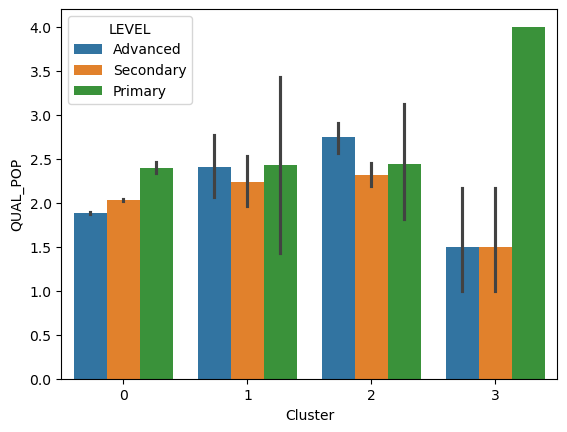

In [725]:
sns.barplot(x = data_unscaled["Cluster"], y = data_unscaled["QUAL_POP"], hue = data_unscaled["LEVEL"])

In [704]:
data_scaled.groupby(by="Cluster")["QUAL_LEVEL"].mean()

Cluster
0   -0.006069
1    0.396771
2    0.500268
3    0.114303
Name: QUAL_LEVEL, dtype: float64

In [734]:
gdf_usa.groupby(by = "Cluster")[gdf_usa.columns()].mean()

TypeError: 'Index' object is not callable

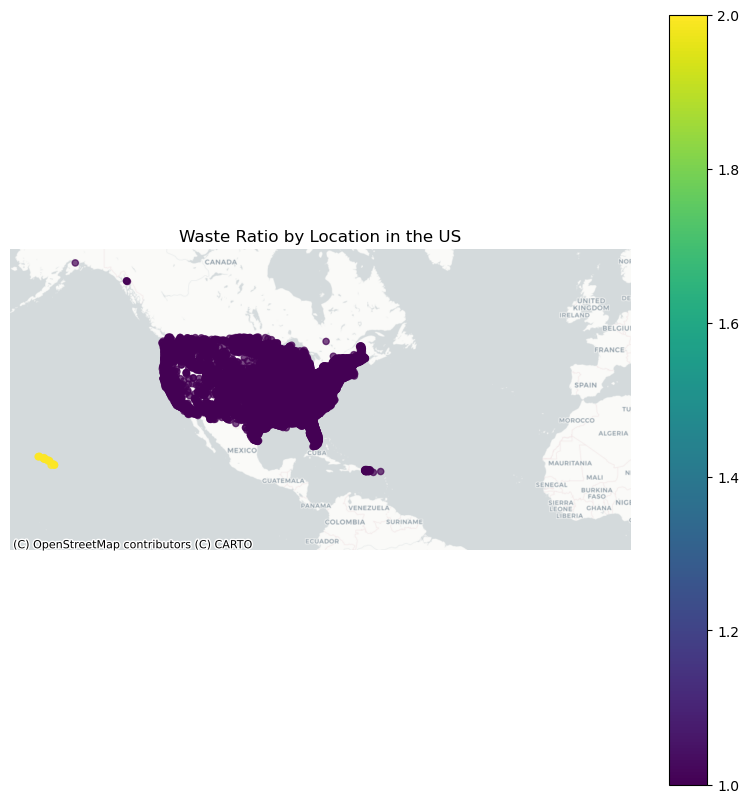

In [690]:
gdf_usa = gpd.GeoDataFrame(
    gdf_usa,
    geometry=[Point(xy) for xy in zip(gdf_usa.LON_WWTP, gdf_usa.LAT_WWTP)]
)

if gdf_usa.crs is None:
    gdf_usa.crs = 'EPSG:4326'

# Convert the GeoDataFrame to the Web Mercator projection (EPSG:3857) for contextily
gdf_web_mercator = gdf_usa.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
usa_boundry.plot(ax=ax, color='none', edgecolor='black')

# Now plot using the converted GeoDataFrame
gdf_web_mercator.plot(ax=ax, column='Cluster', cmap='viridis', alpha=0.7, markersize=20, legend=True)

# Since gdf_web_mercator is in the correct CRS, you can add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Adjusting the plot
ax.set_title('Waste Ratio by Location in the US')
ax.set_axis_off()  # This can be used to hide the axis for a cleaner look

plt.show()

In [ ]:
gdf = gpd.GeoDataFrame(coords_scaled, geometry=gpd.points_from_xy(coords_scaled.LON_WWTP, coords_scaled.LAT_WWTP))

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [413]:
# I split the data at 3 after looking at the dendogram
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(numericalData)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [414]:
data_scaled['Cluster1'] = cluster_labels

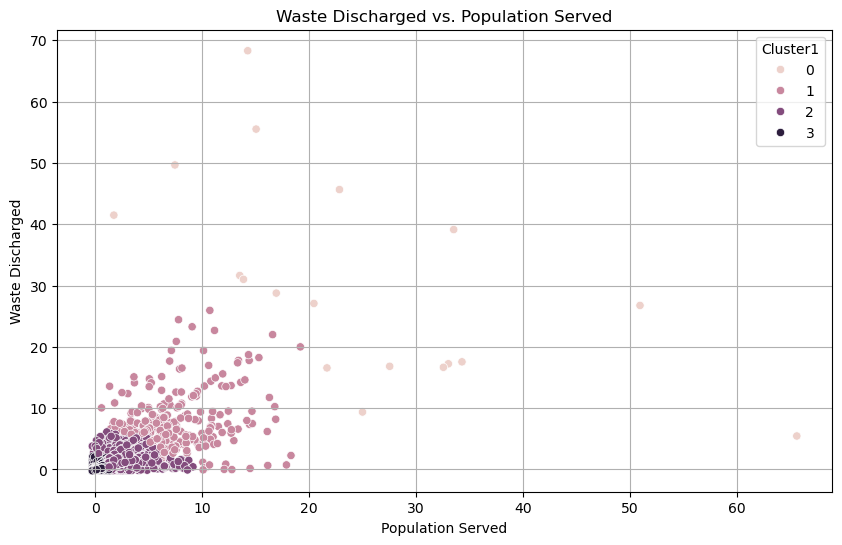

In [415]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.WASTE_DIS, hue = data_scaled.Cluster1)
plt.title('Waste Discharged vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Waste Discharged')
plt.grid()
plt.show()

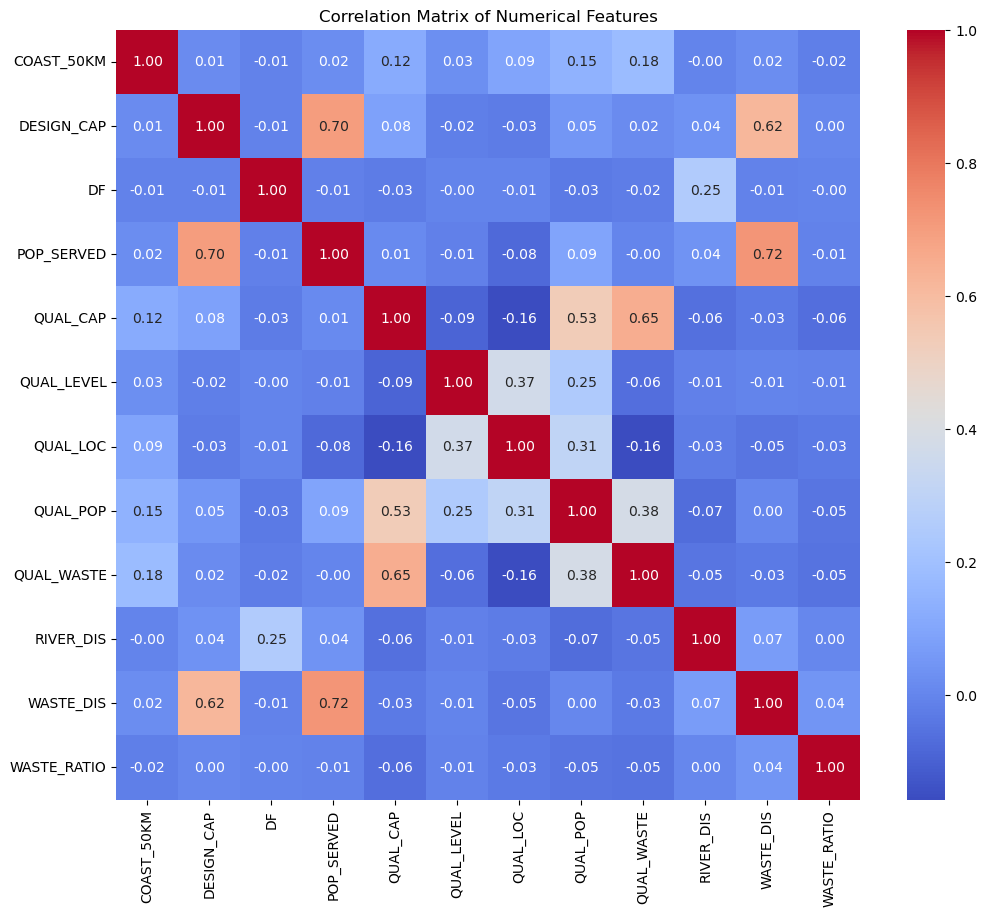

In [117]:
corr_matrix = numerical_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [60]:
# Clustering Dataset based on Population Served and Design Capacity
numerical_imp_features = ['POP_SERVED', 'DESIGN_CAP']
numericalData = numerical_features[numerical_imp_features]

TypeError: list indices must be integers or slices, not list

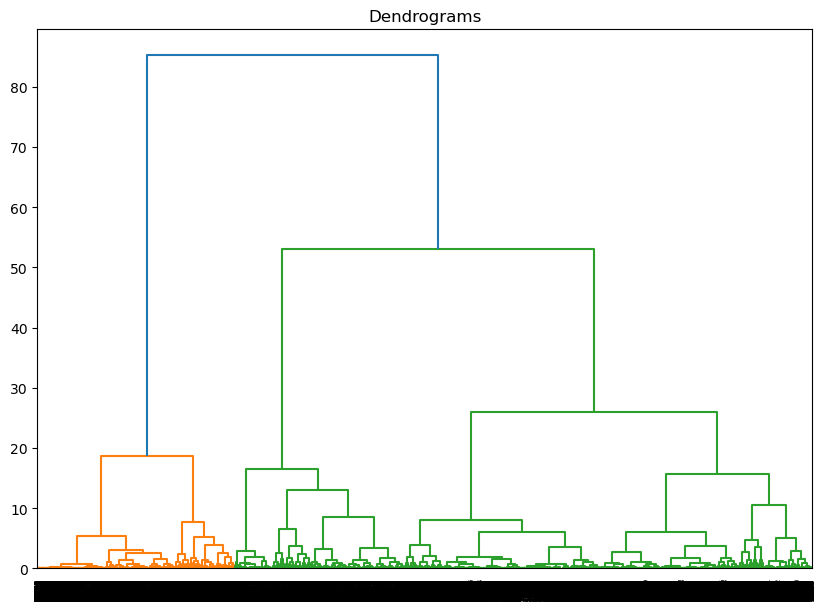

In [120]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(numericalData, method='ward'))

In [121]:
# Looking at the Dendogram I split the data at cluster = 3
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(numericalData)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


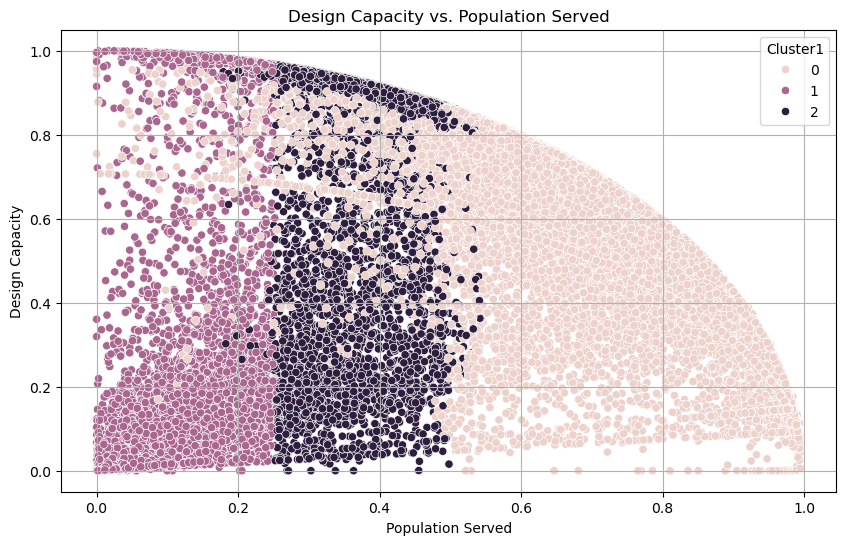

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.DESIGN_CAP, hue = data_scaled.Cluster1)
plt.title('Design Capacity vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

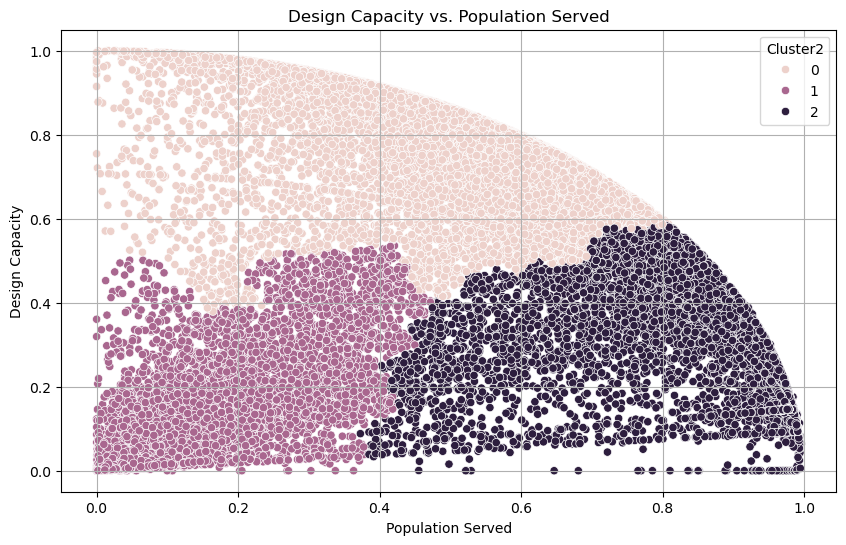

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.POP_SERVED, y=data_scaled.DESIGN_CAP, hue = data_scaled.Cluster2)
plt.title('Design Capacity vs. Population Served')
plt.xlabel('Population Served')
plt.ylabel('Design Capacity')
plt.grid()
plt.show()

In [862]:
data_unscaled.groupby(by = "Cluster")[["POP_SERVED", "WASTE_DIS", "DESIGN_CAP", "DF", "RIVER_DIS"]].mean()

,POP_SERVED,WASTE_DIS,DESIGN_CAP,DF,RIVER_DIS
Cluster,,,,,
0,2.733237e+04,5.959462e+03,1.467088e+04,219957.322017,322.512218
1,1.893985e+06,4.994150e+05,6.310354e+05,393.601937,654.788896
2,7.777524e+05,1.590460e+05,2.346064e+05,664.035155,608.569874
3,2.786449e+06,1.760480e+06,1.823235e+06,375.684923,720.624692


In [51]:
from sklearn.preprocessing import StandardScaler

features = numerical_data[["POP_SERVED", "WASTE_DIS"]]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

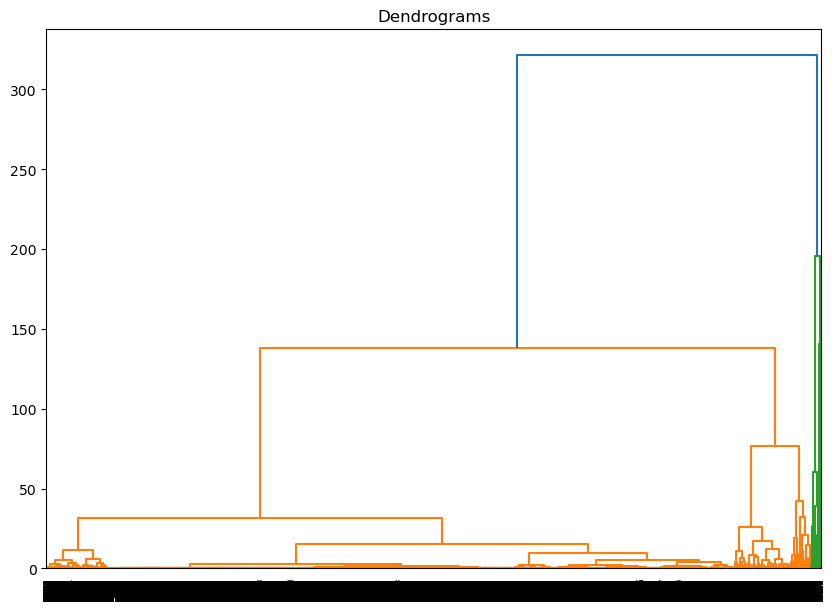

In [52]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

In [54]:
# Looking at the Dendogram I split the data at cluster = 3
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')  
cluster_labels = cluster.fit_predict(features_scaled)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [62]:
features['Cluster'] = cluster_labels

/var/folders/5j/rksnclcn09j1c7_n7bc6nmhr0000gn/T/ipykernel_20040/683329267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = cluster_labels


In [63]:
features

,POP_SERVED,WASTE_DIS,Cluster
0,1060,148.213,2
1,87900,8797.904,0
2,12400,1959.285,2
3,2500,578.482,2
4,1200,167.788,2
...,...,...,...
58497,416,53.713,2
58498,297819,34249.133,0
58499,243038,26832.766,0
58500,41890,5402.785,0


In [64]:
features.groupby(by = "Cluster").mean()


,POP_SERVED,WASTE_DIS
Cluster,,
0,200435.001019,44076.879279
1,23437.139824,15754.775671
2,6291.594911,1423.740039


In [860]:
data_unscaled[data_unscaled.Cluster == 3]

,COAST_10KM,COAST_50KM,Cluster,DESIGN_CAP,DF,DISTANCE_KM,LAT_OUT,LAT_WWTP,LON_OUT,LON_WWTP,...,CNTRY_ISO,COUNTRY,DF_Segment,HYRIV_ID,LEVEL,ORG_ID,SOURCE_ID,STATUS,WASTE_ID,WWTP_NAME
7788,1.0,1.0,3,1640000.0,569.6175,10.230128,53.252,53.341,-6.144,-6.183,...,IRL,Ireland,Moderate Dilution,20289658.0,Secondary,1290318,1,Not Reported,7789,Ringsend Waste Water Treatment Plant
14325,1.0,1.0,3,5630000.0,569.6175,9.027662,38.019,37.938,23.594,23.587,...,GRC,Greece,Moderate Dilution,20656206.0,Advanced,1317354,1,Not Reported,14326,PSYTTALIA
25942,1.0,1.0,3,1514160.0,569.6175,9.112899,33.723,33.804,-118.269,-118.284,...,USA,United States,Moderate Dilution,70726662.0,Secondary,6004009001,2,Not Reported,25943,Joint WPCP
25953,1.0,1.0,3,1936232.1,569.6175,4.392257,33.969,33.931,-118.448,-118.435,...,USA,United States,Moderate Dilution,70720758.0,Secondary,6004010001,2,Not Reported,25954,Hyperion WWTP
26637,1.0,1.0,3,1400598.0,569.6175,8.146794,38.748,38.821,-77.010,-77.018,...,USA,United States,Moderate Dilution,70600814.0,Advanced,11000001001,2,Not Reported,26638,BLUE PLAINS STP
27786,0.0,1.0,3,4542480.0,1.4210,9.614430,41.756,41.814,-87.856,-87.770,...,USA,United States,Low Dilution,70522269.0,Advanced,17000721001,2,Not Reported,27787,Stickney Treatment Plant MWRDGC
30966,0.0,1.0,3,3520422.0,321.4420,2.194780,42.273,42.283,-83.106,-83.129,...,USA,United States,Moderate Dilution,70507605.0,Advanced,26000596001,2,Not Reported,30967,DETROIT STP
33148,0.0,1.0,3,1514160.0,1.0360,4.991340,36.144,36.100,-115.044,-115.033,...,USA,United States,Low Dilution,70665988.0,Advanced,32000200801,2,Projected,33149,SCOP
44900,0.0,0.0,3,1987200.0,1.1100,10.585089,20.102,20.008,-99.235,-99.219,...,MEX,Mexico,Low Dilution,70883160.0,Secondary,4176,4,Not Reported,44901,Atotonilco de Tula
45740,1.0,1.0,3,4200.0,569.6175,6.378191,31.331,31.355,121.660,121.599,...,CHN,China,Moderate Dilution,40635063.0,Secondary,602,5,Not Reported,45741,Shanghai


In [819]:
cluster_ananlysis_3 = data_unscaled[data_unscaled.Cluster == 3]

/var/folders/5j/rksnclcn09j1c7_n7bc6nmhr0000gn/T/ipykernel_20040/3947121840.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


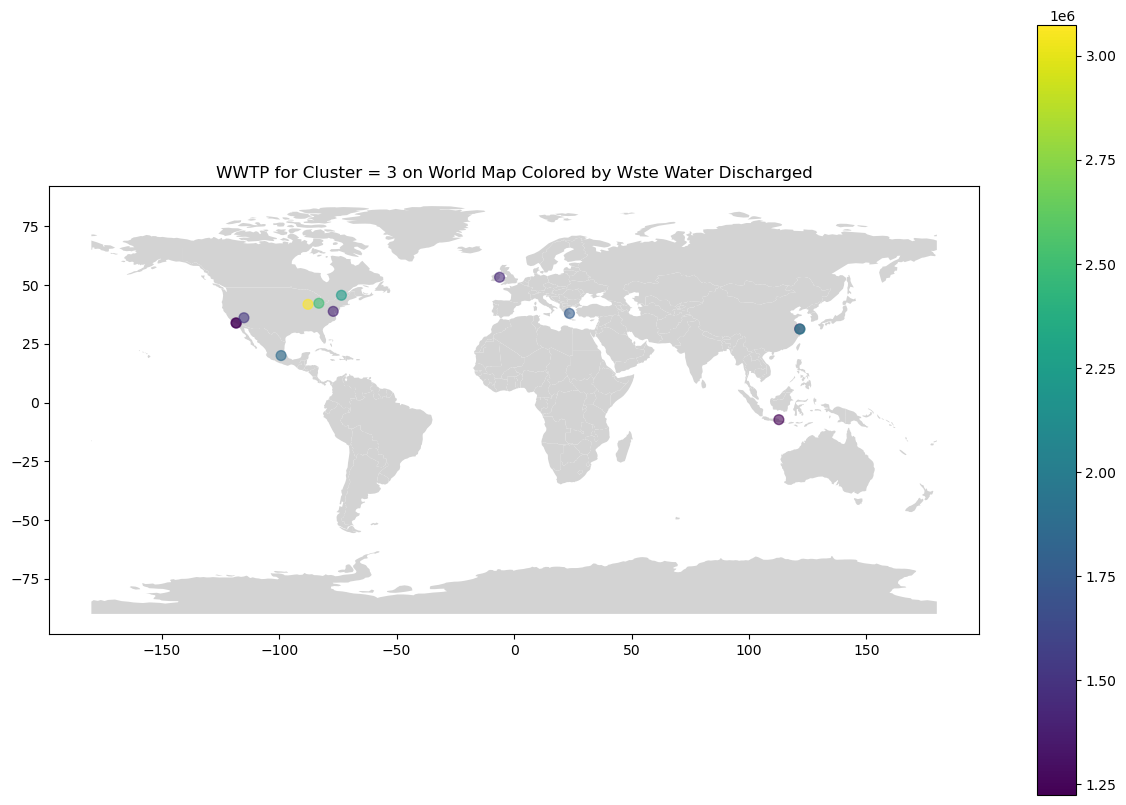

In [826]:
gdf = gpd.GeoDataFrame(cluster_ananlysis_3, geometry=gpd.points_from_xy(cluster_ananlysis_3.LON_WWTP, cluster_ananlysis_3.LAT_WWTP))

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, column='WASTE_DIS', cmap='viridis', legend=True, markersize=50, alpha=0.6)
plt.title('WWTP for Cluster = 3 on World Map Colored by Wste Water Discharged')
plt.show()

In [ ]:
# country_counts = df.groupby(by="COUNTRY").size()
# filtered_countries = country_counts[country_counts >= 5]

In [ ]:
# sorted_series_descending = filtered_countries.sort_values(ascending=False)
# filtered_countries = list(sorted_series_descending.keys())

In [ ]:
# df1 = df[df['COUNTRY'].isin(filtered_countries)]

In [ ]:
# df1[['WASTE_DIS', 'POP_SERVED']] = df1[['WASTE_DIS', 'POP_SERVED']].replace('0', np.nan)


In [ ]:
# df1.isna().sum()

In [ ]:
# df1.head()

In [ ]:
# df1 = df1.drop(columns=["LAT_OUT", "LON_OUT"])

In [ ]:
# subset = df1.groupby(['COUNTRY', 'LEVEL']).agg(
#     plants=('COUNTRY', 'size'),  # Correctly counts the number of occurrences for each continent
#     avg_waste_ratio=('QUAL_WASTE', 'mean')  # Average of 'WASTE_RATIO', automatically skips NAs
# ).reset_index()
# subset



In [ ]:
# df1.head()

In [ ]:
# df1["QUAL_WASTE"].unique()

In [ ]:
# df1["LEVEL"].unique()

In [ ]:
# df1["STATUS"].unique()

In [ ]:
# # Find rows where WWTP_NAME is an empty string
# empty_wwtp_name = df1['WWTP_NAME'] == ""

# # Now you can perform operations on these rows. For example, to set them to NaN:
# df1.loc[empty_wwtp_name, 'WWTP_NAME'] = np.nan

In [ ]:
# # Find rows where WWTP_NAME is an empty string
# empty_df = df1['DF'] == ""

# # Now you can perform operations on these rows. For example, to set them to NaN:
# df1.loc[empty_df, 'DF'] = np.nan

In [ ]:
# for column in df1.columns:
#     temp = df1[column] == ""
#     df1.loc[temp, column] = np.nan

In [ ]:
# print(f"Total percentage of nan val in dataset: {round(max(df1.isna().sum()) / df1.shape[0] * 100, 2)}%")

In [ ]:
# df1['DF'] = pd.to_numeric(df1['DF'], errors='coerce')

# # Calculate the mean of the column, excluding NaN values
# median_value = df1['DF'].median()

# # Replace NaN values in the 'DF' column with the mean
# df1['DF'].fillna(median_value, inplace=True)

In [ ]:
# df1.DF

In [ ]:
# df1.dropna(inplace=True)

In [ ]:
# df1.head()

In [ ]:
# df1.isna().sum()

In [ ]:
# df1[df1.DF == max(df1.DF)]

In [ ]:
# sns.countplot(x='LEVEL', data=df1)

In [ ]:
# country_counts = dict(df1.SOURCE_ID.value_counts())
# country_mapping = {
#     1: "Europe",
#     2: "United States",
#     3: "Brazil",
#     4: "Mexico",
#     5: "China",
#     6: "Canada",
#     7: "Australia",
#     8: "South Africa",
#     9: "India",
#     10: "New Zealand",
#     11: "Peru",
#     12: "Remaining Countries"
# }

# # Replacing numbers with country names
# replaced_counts = {country_mapping[int(number)]: count for number, count in country_counts.items()}
# replaced_counts

In [ ]:
# labels = replaced_counts.keys()
# sizes = replaced_counts.values()
# colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']

# # Plotting the pie chart
# plt.figure(figsize=(5, 5))
# plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('WWTP by Country')
# plt.show()

In [ ]:
# df1.info()

In [ ]:
# numerical_col = []
# for col in df1.columns:
#     if df1[col].dtype != "object":
#         numerical_col.append(col)
# numerical_col = [col for col in numerical_col if not col.endswith("ID")]
# numerical_col

In [ ]:
# sns.countplot(x='QUAL_LOC', data=df1)

In [ ]:
# df1.describe()

In [ ]:
# subset_df = df1[df1['QUAL_LOC'].isin([1, 2, 3])].copy()
# subset_df['QUAL_LOC'] = subset_df['QUAL_LOC'].replace({1: 'High', 2: 'Medium', 3: 'Low'})

# # Using sns.countplot with 'hue'
# plt.figure(figsize=(10, 6))
# sns.countplot(data=subset_df, x='LEVEL', hue='QUAL_LOC', palette='Set2')

# plt.title('Distribution of Treatment Levels by Quality Location Indicator')
# plt.xlabel('Treatment Level')
# plt.ylabel('Count')
# plt.legend(title='QUAL_LOC', title_fontsize='13', labelspacing=1.2)

# plt.show()

In [ ]:
# subset_df = df1[df1['QUAL_LOC'].isin([1, 2, 3])].copy()

# # Using sns.countplot with 'hue'
# plt.figure(figsize=(10, 6))
# sns.countplot(data=subset_df, x='SOURCE_ID', hue='QUAL_LOC', palette='Set2')

# plt.title('Distribution of Treatment Levels by Quality Location Indicator')
# plt.xlabel('Treatment Level')
# plt.ylabel('Count')
# plt.legend(title='QUAL_LOC', title_fontsize='13', labelspacing=1.2)

# plt.show()

In [ ]:
# sns.scatterplot(x = df1.DESIGN_CAP, y = df1.POP_SERVED, hue = df1.LEVEL)

In [ ]:
# sns.scatterplot(x = df1.WASTE_DIS, y = df1.DESIGN_CAP, hue = df1.LEVEL)

In [ ]:
# df1.corr()

In [ ]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
# heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# # from pydantic import BaseSettings # OLD
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df1)
# prof.to_file(output_file='output.html')

In [ ]:
# df1.head()

In [ ]:
# df1.head()

In [ ]:
# sns.histplot(df1.RIVER_DIS, kde = True, bins=range(int(min(df1.RIVER_DIS)) - (int(min(df1.RIVER_DIS)) % 1000), 
#                                    int(max(df1.RIVER_DIS)) + 1000, 1000), 
#          alpha=0.5, edgecolor='black')

# plt.xlim(0, 5000)  # Setting x-axis limit to 5000
# plt.xticks(range(0, 6001, 1000))  # Adjusting x-ticks to match the new x-axis limit
# plt.yticks(range(0, 50001, 10000))
# plt.xlabel('River Distance')
# plt.ylabel("Frequency")
# plt.show()



In [ ]:
# sns.scatterplot(x = np.log10(df1.DESIGN_CAP), y = np.log10(df1.POP_SERVED), hue = df1.LEVEL)
# plt.xlabel("Design Capacity")
# plt.ylabel("Population Served")

In [ ]:
# df1.COAST_50KM.unique()

In [ ]:
# max(df1.RIVER_DIS)

In [ ]:
# min(df1.WASTE_DIS)
# min(df1.POP_SERVED)

In [ ]:
# df1[['WASTE_DIS', 'POP_SERVED']] = df1[['WASTE_DIS', 'POP_SERVED']].replace(0, np.nan)


In [ ]:
# df1.info()

In [ ]:
# df1['WASTE_RATIO'] = df1['WASTE_DIS'] / df1['POP_SERVED']

In [ ]:
# df1.head()

In [ ]:
# df1['CONTINENT'] = coco.convert(names=df1['CNTRY_ISO'], to='continent')

In [ ]:
# df1.head()

In [ ]:
# df1.COUNTRY.value_counts()

In [ ]:
# df_agg = df1.groupby('SOURCE_ID')['WASTE_RATIO'].mean().reset_index()
# df_agg

In [ ]:
# df_agg['COUNTRY'] = df_agg['SOURCE_ID'].map(country_mapping)

In [ ]:
# df_agg

In [ ]:
# plt.figure(figsize=(5, 5))  # Optional: Adjusts the size of the figure
# colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']
# plt.pie(x=df_agg['WASTE_RATIO'], labels=df_agg['COUNTRY'], colors=colors, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Waste Ratio Distribution by Country')
# plt.show()

In [ ]:
# df1.head()

In [ ]:
# df1.drop(columns=["COAST_10KM"], inplace=True)

In [ ]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
# heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# continents_agg = df1.groupby('CONTINENT').agg(
#     plants=('CONTINENT', 'size'),  # Correctly counts the number of occurrences for each continent
#     avg_pop_served=('POP_SERVED', 'mean'),  # Average of 'POP_SERVED', automatically skips NAs
#     avg_disposal=('WASTE_DIS', 'mean'),  # Average of 'WASTE_DIS', automatically skips NAs
#     avg_waste_ratio=('WASTE_RATIO', 'mean')  # Average of 'WASTE_RATIO', automatically skips NAs
# ).reset_index()

In [ ]:
# continents_agg = continents_agg.sort_values(by='plants', ascending=False)
# continents_agg = continents_agg[continents_agg['CONTINENT'].notna()]

In [ ]:
# continents_agg

In [ ]:
# df1.LEVEL

In [ ]:
# plant_levels = df1.groupby(['CONTINENT', 'LEVEL']).agg(
#     plants=('CONTINENT', 'size'),  # Correctly counts the number of occurrences for each continent
#     avg_waste_ratio=('WASTE_RATIO', 'mean')  # Average of 'WASTE_RATIO', automatically skips NAs
# ).reset_index()

In [ ]:
# plant_levels

In [ ]:
# sns.barplot(x = plant_levels.CONTINENT, y = plant_levels.plants, hue=plant_levels.LEVEL)

In [ ]:
# sns.barplot(x = plant_levels.CONTINENT, y = plant_levels.avg_waste_ratio, hue=plant_levels.LEVEL)

In [ ]:
# wwtp_india = df1[df1.COUNTRY == "India"]

In [ ]:
# avg_waste_ratio_india = wwtp_india['WASTE_RATIO'].mean(skipna=True)

In [ ]:
# print(f"Avg waste ratio in India is {round(avg_waste_ratio_india, 4)}")

In [ ]:
# # Load countries data from Natural Earth through GeoPandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Select only the 'name', 'continent', and 'geometry' columns
# world = world[['name', 'continent', 'geometry']]

# # Filter for India
# india_boundry = world[world['name'] == "India"]

# # Display the result
# india_boundry

In [ ]:
# india_df = df1[df1['COUNTRY'] == "India"]
# india_df.head()

In [ ]:
# gdf = gpd.GeoDataFrame(india_df, geometry=gpd.points_from_xy(india_df.LON_WWTP, india_df.LAT_WWTP), crs="EPSG:4326")
# gdf.head()

In [ ]:
# # Assuming 'df' is your pandas DataFrame containing 'level', 'waste_ratio', and 'coast_10km' columns

# # Convert 'coast_10km' to a categorical type if it's not already
# df1['COAST_50KM'] = df1['COAST_50KM'].astype('category')

# # Create the jitter plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.stripplot(data=df1, x='LEVEL', y='WASTE_RATIO', hue='COAST_50KM', jitter=True, alpha=0.5, dodge=True, palette='viridis')

# # Set the y-axis to log scale
# plt.yscale('log')

# # Customizing the plot with titles and labels
# plt.title('Waste Water Discharge Per Capita')
# plt.suptitle('Waste Water Discharge Per Capita by Distance to Coast and Level', fontsize=10)
# plt.xlabel('Distance to Coast')
# plt.ylabel('Waste Water Discharge Per Capita')
# plt.legend(title='Coast, 50km')

# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# india_boundry.plot(ax=ax, color='none', edgecolor='black')

# # Plot points
# gdf.plot(ax=ax, column='WASTE_RATIO', cmap='viridis', alpha=0.7, markersize=20, legend=True, norm=Normalize(vmin=gdf['WASTE_RATIO'].min(), vmax=gdf['WASTE_RATIO'].max()))
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# # Adjusting the plot
# ax.set_title('Waste Ratio by Location in India')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# X = india_df[['WASTE_RATIO']].values

In [ ]:
# k = 3  # Example number of clusters

# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

In [ ]:
# # Assign the cluster labels back to the DataFrame
# india_df['Cluster'] = kmeans.labels_

In [ ]:
# india_df

In [ ]:
# india_df.Cluster.value_counts()

In [ ]:
# india_df["DummyY"] = india_df['Cluster'].apply(lambda x: x + np.random.random())  # To spread out points vertically

In [ ]:
# # Assuming india_df is your DataFrame and centroids are calculated from your clustering model
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=india_df, x='WASTE_RATIO', y='DummyY', hue='Cluster', palette='viridis', legend='full', s=50)

# # Here's an example where we just plot them across a fixed range in the y-axis to show their presence
# for i, centroid in enumerate(centroids[:, 0]):  # Loop through each centroid's x-value
#     plt.scatter(centroid, i + 0.5, s=50, c='red', marker='X')  # i + 0.5 just as an example to spread centroids

# plt.title('Clusters of WWTP based on WASTE_RATIO with Approximated Centroids')
# plt.xlabel('Waste Ratio')
# plt.ylabel('')
# plt.yticks([])  # Hide y-axis ticks
# plt.legend(title='Cluster')
# plt.show()

In [ ]:
# india_df[india_df['Cluster'] == 0].head()

In [ ]:
# india_df[india_df['Cluster'] == 0].tail()

In [ ]:
# india_df[india_df['Cluster'] == 1].head()

In [ ]:
# india_df[india_df['Cluster'] == 2].head()

In [ ]:
# india_df["RIVER_WASTE"] = india_df["RIVER_DIS"]/india_df['POP_SERVED']

In [ ]:
# wwtp_usa = df1[df1.COUNTRY == "United States"]

In [ ]:
# avg_waste_ratio_usa = wwtp_usa['WASTE_RATIO'].mean(skipna=True)

In [ ]:
# print(f"Avg waste ratio in the US is {round(avg_waste_ratio_usa, 4)}")

In [ ]:
# # Load countries data from Natural Earth through GeoPandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Select only the 'name', 'continent', and 'geometry' columns
# world = world[['name', 'continent', 'geometry']]

# # Filter for USA
# usa_boundry = world[world['name'] == "United States of America"]

# # Display the result
# usa_boundry

In [ ]:
# usa_df = df1[df1['COUNTRY'] == "United States"]
# # usa_df.head()

In [ ]:
# gdf = gpd.GeoDataFrame(usa_df, geometry=gpd.points_from_xy(usa_df.LON_WWTP, usa_df.LAT_WWTP), crs="EPSG:4326")
# gdf.head()

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# usa_boundry.plot(ax=ax, color='none', edgecolor='black')

# # Plot points
# gdf.plot(ax=ax, column='WASTE_RATIO', cmap='viridis', alpha=0.7, markersize=20, legend=True, norm=Normalize(vmin=gdf['WASTE_RATIO'].min(), vmax=gdf['WASTE_RATIO'].max()))
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# # Adjusting the plot
# ax.set_title('Waste Ratio by Location in India')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# plt.show()

In [ ]:
# X = usa_df[['WASTE_RATIO']].values

In [ ]:
# k = 3  # Example number of clusters

# # Perform K-Means clustering
# kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

In [ ]:
# usa_df['Cluster'] = kmeans.labels_

In [ ]:
# usa_df["Cluster"].value_counts()

In [ ]:
# usa_df["DummyY"] = usa_df['Cluster'].apply(lambda x: x + np.random.random())  # To spread out points vertically

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=usa_df, x='WASTE_RATIO', y='DummyY', hue='Cluster', palette='viridis', legend='full', s=50)

# # Here's an example where we just plot them across a fixed range in the y-axis to show their presence
# for i, centroid in enumerate(centroids[:, 0]):  # Loop through each centroid's x-value
#     plt.scatter(centroid, i + 0.5, s=50, c='red', marker='X')  # i + 0.5 just as an example to spread centroids

# plt.title('Clusters of WWTP based on WASTE_RATIO with Approximated Centroids')
# plt.xlabel('Waste Ratio')
# plt.ylabel('')
# plt.yticks([])  # Hide y-axis ticks
# plt.legend(title='Cluster')
# plt.show()

In [ ]:
# usa_df[usa_df["Cluster"] == 0].head()

In [ ]:
# usa_df[usa_df["Cluster"] == 1].head()

In [ ]:
# usa_df[usa_df["Cluster"] == 2].head()

In [842]:
numerical_features_knn.columns.shape

(18,)

In [847]:
numerical_features_knn = numerical_features.drop(columns="Cluster")
normalized_df = normalize(numerical_features_knn) 
normalized_df = pd.DataFrame(normalized_df, columns=numerical_features_knn.columns, index=numerical_features_knn.index)

/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rishabkhuba/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/

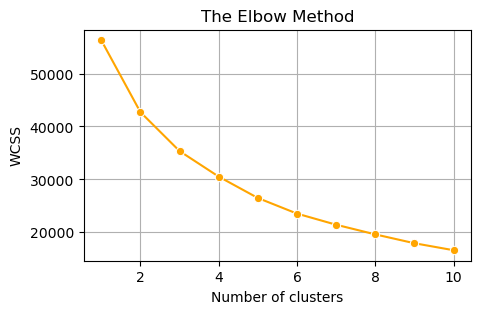

In [849]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(normalized_df)
    # inertia method returns wcss for that model
    wcss.append([i,kmeans.inertia_])

    
wcss_x = [i[0] for i in wcss]
wcss_y = [i[1] for i in wcss]

plt.figure(figsize=(5,3))
sns.lineplot(x=wcss_x, y=wcss_y, marker='o',color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()